# Customer Churn

The telecom [dataset](https://github.com/IBM/telco-customer-churn-on-icp4d) includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


The dataset includes information that can be grouped as the following:
1.	Personal information:
    *	CustomerID: A unique ID that identifies each customer.
    *	Dependent: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
    *	Gender: The customer’s gender: Male, Female.
    *	Senior Citizen: Indicates if the customer is 65 or older: Yes, No.
    *	Partner: Indicate if the customer has a partner: Yes, No.
2.	Contract information:
    *	Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
    *	Tenure months: Indicates the total number of months that the customer has been with the company by the end of the quarter specified above.
    *	Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No.
    *	Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.
    *   PhoneService: Indicates if the customer subscribes to home phone service with the company: Yes, No.
3.	Financial information:
    *	Monthly Charges: Indicates the customer’s current total monthly charge for all their services from the company.
    *	Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
4.	Additional services information:
    *	Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No. 
    *	Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
    *	Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No.
    *	Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.
    *	Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.
    *	Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third-party provider: Yes, No. The company does not charge an additional fee for this service.
    *	Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third-party provider: Yes, No. The company does not charge an additional fee for this service.
    *	Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No.


* The dependent variable: Churn with a binary outcome, namely:
    * Yes = if the customer left the company this quarter. 
    * No = if the customer remained with the company.

Notizen

* Map with binary outcome vars such as gender to 0 1 
* Look at phone service and internet service, probably drop?


Findings:
* The longer a customer is with the company the less likely it is for her to leave.
* Having a one or two year contract reduces the probability of leaving

Questions:
* In Naive Approach alles reinwerfen?
* Die Koeffizienten für alle mit DoubleML berechnen?

In [4]:
# Version of packages I use in this notebook

import pkg_resources

# List of packages you've imported
imported_packages = ['pandas', 'numpy', 'plotly', 'networkx', 'sklearn', 'doubleml','statsmodels']   # Add the names of your imported packages here

# Function to get package version
def get_package_version(package_name):
    try:
        return pkg_resources.get_distribution(package_name).version
    except pkg_resources.DistributionNotFound:
        return None

# Get versions of imported packages
package_versions = {pkg: get_package_version(pkg) for pkg in imported_packages}

# Print package versions
for pkg, version in package_versions.items():
    print(f"{pkg}: {version}")


pandas: 1.4.4
numpy: 1.21.6
plotly: 5.9.0
networkx: 2.8.4
sklearn: None
doubleml: 0.7.0
statsmodels: 0.13.2


In [6]:
file_path = "requirements.txt"

## Open the file in write mode
with open(file_path, "w") as file:
    # Write each key-value pair to the file
    for key, value in package_versions.items():
        file.write(f"{key}: {value}\n")

## Importing Packages and Dataset 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import networkx as nx
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


from doubleml import DoubleMLData
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score

import doubleml as dml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV, LogisticRegressionCV, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.pipeline import make_pipeline
from statsmodels.api import OLS
import statsmodels.api as sm

In [58]:
df_initial = pd.read_csv("Telco-Customer-Churn-Copy1.csv")
df_initial.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df_initial.shape

(7043, 21)

In [4]:
df_initial.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
df_initial.TotalCharges = pd.to_numeric(df_initial.TotalCharges, errors='coerce')

## Functions Engineering  

In the following I create different types of functions to use for the analysis. 

### Helpful Functions

In [62]:
#def Chrun_dist(df, col):
#    return df.groupby(["Churn" ,col]).size().unstack()

In [63]:
def find_similar_variables(variables, words):
    return [var for word in words for var in variables if word.lower() in var.lower().replace("_", "")]

In [64]:
def remove_underscore(input_string):
    parts = input_string.split('_')
    result = parts[0]
    return result

In [65]:
def Churn_dist(df, *args):
    return df.groupby(["Churn"] + list(args)).size().unstack()

In [66]:
def unique_labels(df):
    for column in df.columns:
        unique_labels = df[column].unique()
        print(f"{column}: {unique_labels}")

In [67]:
def feature_corr(df):
    all_dtypes = pd.DataFrame(df.dtypes).reset_index().rename(columns={0:"dtype"})
    drop_col = all_dtypes[all_dtypes["index"]=="Churn"].index.values[0]
    all_dtypes = all_dtypes.drop(drop_col, axis=0)
    num_df_col = all_dtypes[all_dtypes.dtype =="float64"].index.values
    cat_df_col = all_dtypes[all_dtypes.dtype !="float64"].index.values

    Feature_dummies = df.iloc[:, cat_df_col]
    df_dummies = pd.get_dummies(df)
    feature_corr = pd.DataFrame(df_dummies.corr()["Churn"])
    feature_corr =feature_corr[feature_corr.Churn<1] 
    feature_corr = feature_corr.sort_values(by="Churn", ascending=False)
    return feature_corr

In [68]:
def Churn_corr(col, *args):
    cols = [col, "Churn"] + list(args)
    df_dummies = pd.get_dummies(df_clean[cols])
    return pd.DataFrame(df_dummies.corr()["Churn"])

In [69]:
def plot_coeff(df, Title):

# Create a DataFrame for plotting
    df_ols = pd.DataFrame({'Values': df.coef, 'Lower': df["2.5 %"], 'Upper': df["97.5 %"], 'p-values': df["P>|t|"]})

# Sort the DataFrame by Values for better visualization
    df_ols = df_ols.sort_values(by="Values", ascending=False)

# Function to add significance stars
    def add_significance_stars(p_value):
        if p_value < 0.01:
            return '***'
        elif p_value < 0.05:
            return '**'
        elif p_value < 0.1:
            return '*'
        else:
            return ''

    # Add significance stars to the y-axis labels
    df_ols['Labels'] = [f"{label} {add_significance_stars(p)}" for label, p in zip(df_ols.index, df_ols['p-values'])]

    # Plotting
    fig, ax = plt.subplots(figsize=(16, 12))

    # Choose colors based on significance stars
    bar_colors = ['purple' if add_significance_stars(p_value)=="***" 
                  else 'green' if add_significance_stars(p_value)=="**"  
                  else 'orange' if add_significance_stars(p_value)=="*"
                  else 'blue' for p_value in df_ols['p-values']]
    #errorbar_colors = ['r' if add_significance_stars(p_value) else 'b' for p_value in df_ols['p-values']]

    ax.barh(df_ols['Labels'], df_ols["Values"].values, color=bar_colors, alpha=0.7, label='Coefficients')
    ax.vlines(x=0, ymin=-1, ymax=len(df_ols), linewidth=2, color='r', linestyle='--', label='Zero Line')
    ax.errorbar(x=df_ols["Values"], y=df_ols['Labels'], xerr=[df_ols["Values"] - df_ols["Lower"], df_ols["Upper"] - df_ols["Values"]],
                fmt='o', markersize=8, color='black', ecolor='black', capsize=10, label='95% Confidence Interval')

    # Add legend
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='***'),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='**'),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='*'),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Not significant'),
                      plt.Line2D([0], [0], linestyle='--', color='r', label='Zero Line'),
                      plt.Line2D([0], [0], marker = 'o', color='black', label='95% Confidence Interval')]

    ax.legend(handles=legend_handles, title='Significance Level', loc='upper right')

    # Customize the plot
    ax.set_title(Title + ' Model: Coefficients and Confidence Intervals (95% level)' , fontdict={"fontsize":16})
    plt.savefig(Title + ".png", format="png")
    plt.show()



## DoubleML Algorithms 

### Naive Approach

In [70]:
def Naive_App(Treatment):
    results_dict = {'coef': [], 'std err ': [], 't': [], "P>|t|": [],
                    '2.5 %': [], '97.5 %': []}
    depnd = "Churn"
    drop_cols = [depnd]+ list(find_similar_variables(data_labels, [remove_underscore(Treatment)]))
    
    X = data_dummies.drop(columns=drop_cols)
    X = sm.add_constant(X)
    Y = data_dummies.Churn
    model = OLS(Y,X)
    results = model.fit()
    
    residuals = pd.DataFrame(results.resid, columns=["Residuals"])
    residuals[Treatment] = data_dummies[Treatment]

    X = residuals
    X = sm.add_constant(X)
    Y = df_clean.Churn
    model_residuals = sm.OLS(Y, X)
    results_residuals = model_residuals.fit()

    # Extract data and add to dictionary
    #results_dict['Variable'].append(Treatment)
    results_dict['coef'].append(round(results_residuals.params[Treatment], 4))
    results_dict['std err '].append(round(results_residuals.bse[Treatment], 4))
    results_dict['t'].append(round(results_residuals.tvalues[Treatment], 4))
    results_dict['P>|t|'].append(round(results_residuals.pvalues[Treatment], 4))
    conf_interval = results_residuals.conf_int().loc[Treatment]
    results_dict['2.5 %'].append(round(conf_interval[0], 4))
    results_dict['97.5 %'].append(round(conf_interval[1], 4))
    results_df = pd.DataFrame(results_dict, index=[Treatment])
    return results_df

### Linear and Logistic Regression

In [71]:
def dml_MLPLR_Linear(Treatment):
    depnd = "Churn"
    drop_cols = find_similar_variables(dml_labels, [remove_underscore(Treatment)])
    drop_cols_dml = ["Churn"]+ list(drop_cols) #+ Reference_cols
    x_labels = list(df_dml.drop(columns=drop_cols_dml).columns.values)
    results_dict = {'coef': [], 'std': [], 't': [], "P>|t|": [],
                    '2.5 %': [], '97.5 %': [], "ml_l": [], "ml_m": []}

    data_dml_base = DoubleMLData(
        df_dml,
        y_col=depnd,
        d_cols=Treatment,
        x_cols=x_labels
    )
    C = 0.05
    reg_learner = LinearRegression(n_jobs=-1)
    class_learner =  LogisticRegression(penalty='l1', solver='liblinear',
                                                 C=C, max_iter=1000)
   
    
    if Treatment in ["Tenure_Bin_1"]:
        class_learner =  LogisticRegression(penalty='l1', solver='liblinear',
                                                 C=0.025, max_iter=1000)
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                               ml_l = reg_learner,
                               ml_m = class_learner,
                               n_folds = 5)
    elif Treatment in ["Tenure_Bin_6"]:
        class_learner =  LogisticRegression(penalty='l1', solver='liblinear',
                                                 C=0.075, max_iter=1000)
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                               ml_l = reg_learner,
                               ml_m = class_learner,
                               n_folds = 5)    
    elif Treatment not in num_labels:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                               ml_l = reg_learner,
                               ml_m = class_learner,
                               n_folds = 5)
    else:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                               ml_l = reg_learner,
                               ml_m = reg_learner,
                               n_folds = 5)
    dml_plr.fit(store_predictions=True)

    results_df = dml_plr.summary
    results_df['ml_l'] = dml_plr.rmses['ml_l']
    results_df['ml_m'] = dml_plr.rmses['ml_m']
        
    return results_df

### Decision Tree

In [72]:
 # Variables with a different model parameters
spec_vars = ["MultipleLines_Yes", "InternetService_DSL", "PhoneService"]

In [73]:
def dml_MLPLR_DT(Treatment):
    depnd = "Churn"
    drop_cols = find_similar_variables(dml_labels, [remove_underscore(Treatment)])
    drop_cols_dml = ["Churn"]+ list(drop_cols) #+ Reference_cols
    x_labels = list(df_dml.drop(columns=drop_cols_dml).columns.values)
    results_dict = {'coef': [], 'std': [], 't': [], "P>|t|": [],
                    '2.5 %': [], '97.5 %': [], "ml_l": [], "ml_m": []}

    data_dml_base = DoubleMLData(
        df_dml,
        y_col=depnd,
        d_cols=Treatment,
        x_cols=x_labels
    )
   
    
    if Treatment not in spec_vars:
        reg_learner = DecisionTreeRegressor(
            ccp_alpha=0.0004, random_state=0)
        class_learner = DecisionTreeClassifier(
             ccp_alpha=0.05,  random_state=0)
    else:
        reg_learner = DecisionTreeRegressor(
            ccp_alpha=0.001, random_state=0)
        class_learner = DecisionTreeClassifier(
            ccp_alpha=0.1, random_state=0)
    # Check if the treatment is binary or not
    if Treatment not in num_labels:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                                         ml_l = reg_learner,
                                         ml_m = class_learner,
                                         n_folds = 5)
    else:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                                         ml_l = reg_learner,
                                         ml_m = reg_learner,
                                         n_folds = 5)
    dml_plr.fit(store_predictions=True)
        #forest_summary = dml_plr_forest.summary   
        
    results_df = dml_plr.summary
    results_df['ml_l'] = dml_plr.rmses['ml_l']
    results_df['ml_m'] = dml_plr.rmses['ml_m']
        
    return results_df



### Random Forest

In [74]:
def dml_MLPLR_RF(Treatment):
    depnd = "Churn"
    drop_cols = find_similar_variables(dml_labels, [remove_underscore(Treatment)])
    drop_cols_dml = ["Churn"]+ list(drop_cols) #+ Reference_cols
    x_labels = list(df_dml.drop(columns=drop_cols_dml).columns.values)
    results_dict = {'coef': [], 'std': [], 't': [], "P>|t|": [],
                    '2.5 %': [], '97.5 %': [], "ml_l": [], "ml_m": []}

    data_dml_base = DoubleMLData(
        df_dml,
        y_col=depnd,
        d_cols=Treatment,
        x_cols=x_labels
    )
    
    if Treatment not in spec_vars:
        reg_learner = RandomForestRegressor(
            n_estimators=300, max_depth=8, max_features=3, min_samples_leaf=4, n_jobs=-1, random_state=0)
        class_learner = RandomForestClassifier(
            n_estimators=300, max_depth=7, max_features=4, min_samples_leaf=7, n_jobs=-1, random_state=0)
    else:
        reg_learner = RandomForestRegressor(
            n_estimators=200, max_depth=6, max_features=4, min_samples_leaf=3, n_jobs=-1, random_state=0)
        class_learner = RandomForestClassifier(
            n_estimators=200, max_depth=2, max_features=4, min_samples_leaf=3,  n_jobs=-1, random_state=0)

    
    # Check if the treatment is binary or not
    if Treatment not in num_labels:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                                         ml_l = reg_learner,
                                         ml_m = class_learner,
                                         n_folds = 5)
    else:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                                         ml_l = reg_learner,
                                         ml_m = reg_learner,
                                         n_folds = 5)
    dml_plr.fit(store_predictions=True)
        #forest_summary = dml_plr_forest.summary   
        
    results_df = dml_plr.summary
    results_df['ml_l'] = dml_plr.rmses['ml_l']
    results_df['ml_m'] = dml_plr.rmses['ml_m']
        
    return results_df



### XGBoost

In [75]:
def dml_MLPLR_xgboost(Treatment):
    depnd = "Churn"
    drop_cols = find_similar_variables(dml_labels, [remove_underscore(Treatment)])
    drop_cols_dml = ["Churn"]+ list(drop_cols) + Reference_cols
    x_labels = list(df_dml.drop(columns=drop_cols_dml).columns.values)
    results_dict = {'coef': [], 'std': [], 't': [], "P>|t|": [],
                    '2.5 %': [], '97.5 %': [], "ml_l": [], "ml_m": []}

    data_dml_base = DoubleMLData(
        df_dml,
        y_col=depnd,
        d_cols=Treatment,
        x_cols=x_labels
    )
    reg_learner = XGBRegressor(n_jobs=-1, objective = "reg:squarederror",
                            eta=0.01, n_estimators=300, max_depth=7,  random_state=0)
    class_learner = XGBClassifier(use_label_encoder=False, n_jobs=-1,
                            objective = "binary:logistic", eval_metric = "logloss",
                            eta=0.01, n_estimators=150, max_depth=6, random_state=0)

    
    # Check if the treatment is binary or not
    if Treatment not in num_labels:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                                         ml_l = reg_learner,
                                         ml_m = class_learner,
                                         n_folds = 5)
    else:
        np.random.seed(123)
        dml_plr = dml.DoubleMLPLR(data_dml_base,
                                         ml_l = reg_learner,
                                         ml_m = reg_learner,
                                         n_folds = 5)
    dml_plr.fit(store_predictions=True)

    results_df = dml_plr.summary
    results_df['ml_l'] = dml_plr.rmses['ml_l']
    results_df['ml_m'] = dml_plr.rmses['ml_m']
        
    return results_df

## Data Preprocessing and Preparation

In [76]:
df_initial.drop(columns="customerID", inplace=True)

In [77]:
df_initial.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [78]:
df_clean = df_initial.copy().dropna()

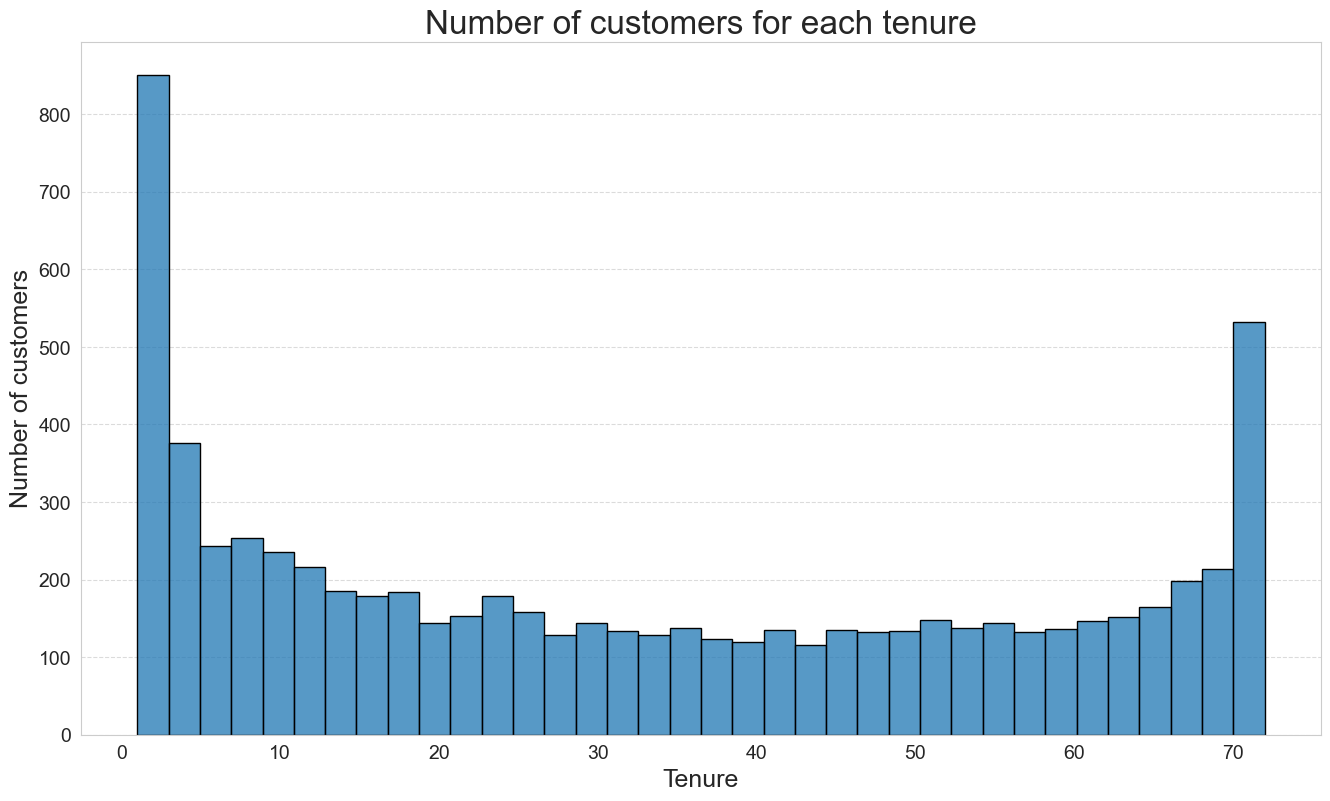

In [79]:
sns.set_style("whitegrid")

plt.figure(figsize=(16, 9))
sns.histplot(df_clean.tenure, bins=36,  edgecolor='black')

# Add title and labels with increased font size
plt.title("Number of customers for each tenure", fontsize=24)
plt.xlabel("Tenure", fontsize=18)
plt.ylabel("Number of customers", fontsize=18)

# Adjust ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add vertical grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(False, axis="x")
plt.show()

In [80]:
# Creating 6 bins with 12 months steps 
bin_edges = np.arange(0, 84, 12)  

# Define bin labels
bin_labels = [i for i in range(1, 7)]

# Apply binning to the continuous variable
df_clean['Tenure_Bin'] = pd.cut(df_clean['tenure'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df_clean = df_clean.drop(columns="tenure")
df_clean["Tenure_Bin"] = df_clean["Tenure_Bin"].values

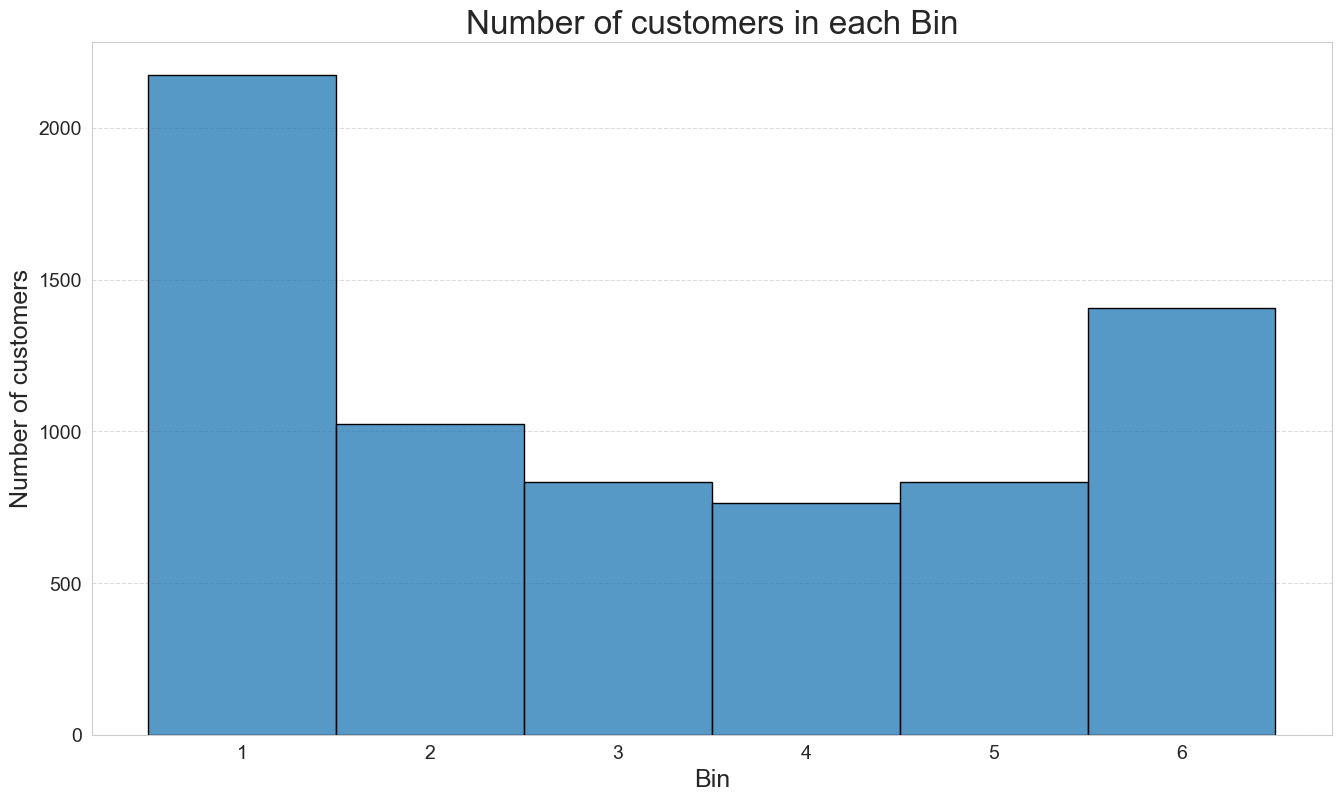

In [81]:

# Sort the bins
sorted_bins = df_clean.Tenure_Bin.value_counts().sort_index().index

# Set style
sns.set_style("whitegrid")

# Create figure and axes
plt.figure(figsize=(16, 9))

# Plot the histogram with sorted bins
sns.histplot(df_clean.Tenure_Bin,  edgecolor='black', discrete=True)

# Add title and labels with increased font size
plt.title("Number of customers in each Bin", fontsize=24)
plt.xlabel("Bin", fontsize=18)
plt.ylabel("Number of customers", fontsize=18)

# Adjust ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add vertical grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(False, axis="x")
plt.show()


In [82]:
results= round(np.transpose(df_initial.groupby("Churn").describe(percentiles=[0.1, 0.25, 0.5, 0.75, .9])["tenure"]),0)
results.to_excel("tenure.xlsx", index=True)

In [83]:
results

Churn,No,Yes
count,5174.0,1869.0
mean,38.0,18.0
std,24.0,20.0
min,0.0,1.0
10%,4.0,1.0
25%,15.0,2.0
50%,38.0,10.0
75%,61.0,29.0
90%,71.0,51.0
max,72.0,72.0


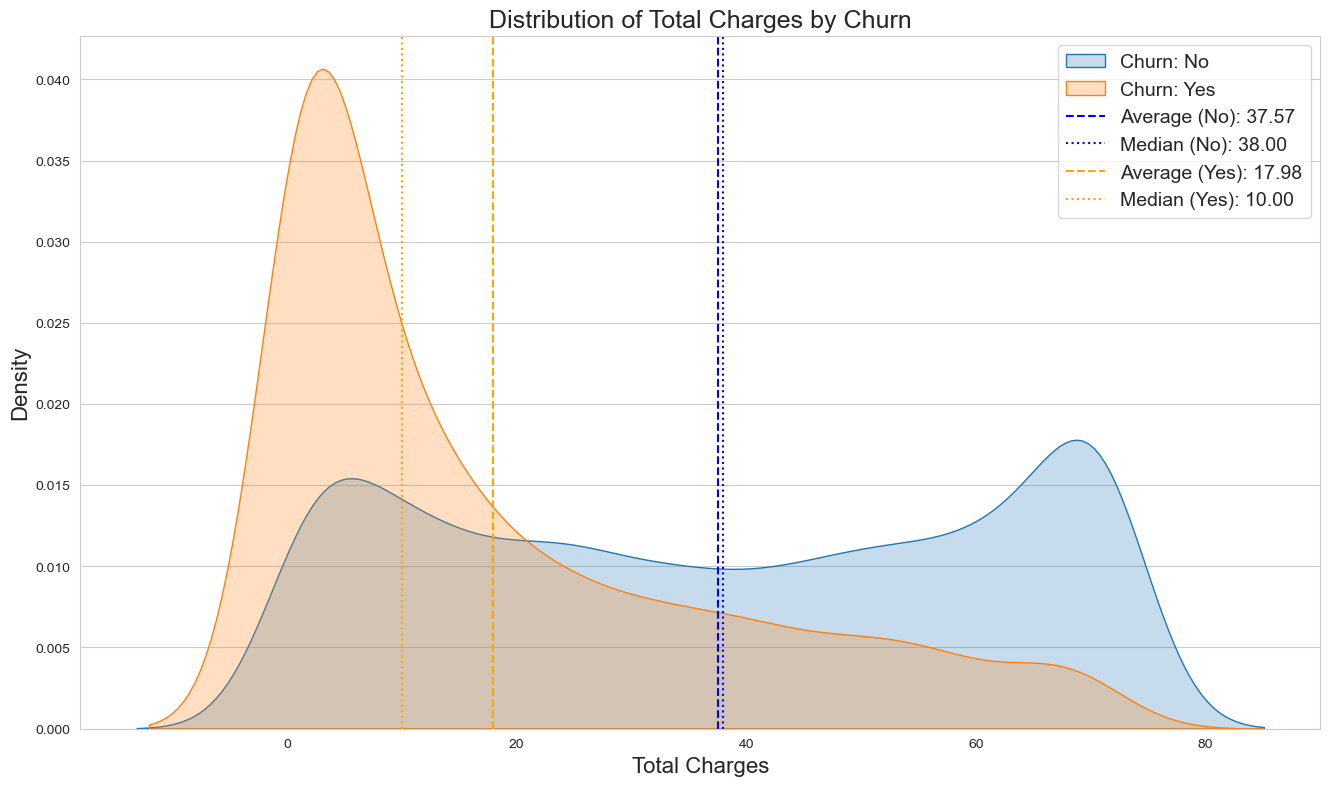

In [84]:
# Calculate average and median for both churn groups
average_no = df_initial[df_initial["Churn"] == "No"]["tenure"].mean()
median_no = df_initial[df_initial["Churn"] == "No"]["tenure"].median()

average_yes = df_initial[df_initial["Churn"] == "Yes"]["tenure"].mean()
median_yes = df_initial[df_initial["Churn"] == "Yes"]["tenure"].median()

# Create the KDE plot
plt.figure(figsize=(16, 9))
sns.kdeplot(df_initial[df_initial["Churn"] == "No"]["tenure"], label="Churn: No", shade=True)
sns.kdeplot(df_initial[df_initial["Churn"] == "Yes"]["tenure"], label="Churn: Yes", shade=True)

# Add vertical lines for average and median
plt.axvline(average_no, color='blue', linestyle='--', label=f'Average (No): {average_no:.2f}')
plt.axvline(median_no, color='blue', linestyle=':', label=f'Median (No): {median_no:.2f}')

plt.axvline(average_yes, color='orange', linestyle='--', label=f'Average (Yes): {average_yes:.2f}')
plt.axvline(median_yes, color='orange', linestyle=':', label=f'Median (Yes): {median_yes:.2f}')

# Set title and labels with increased fontsize
plt.title("Distribution of Total Charges by Churn", fontsize=18)
plt.xlabel("Total Charges", fontsize=16)
plt.ylabel("Density", fontsize=16)

# Add legend
plt.legend(fontsize=14)

# Remove grid lines and y-axis ticks
plt.grid(False, axis="x")


# Save the plot as a PNG file
plt.savefig("Tenure_KDE_Plot.png", format="png")

# Show the plot
plt.show()


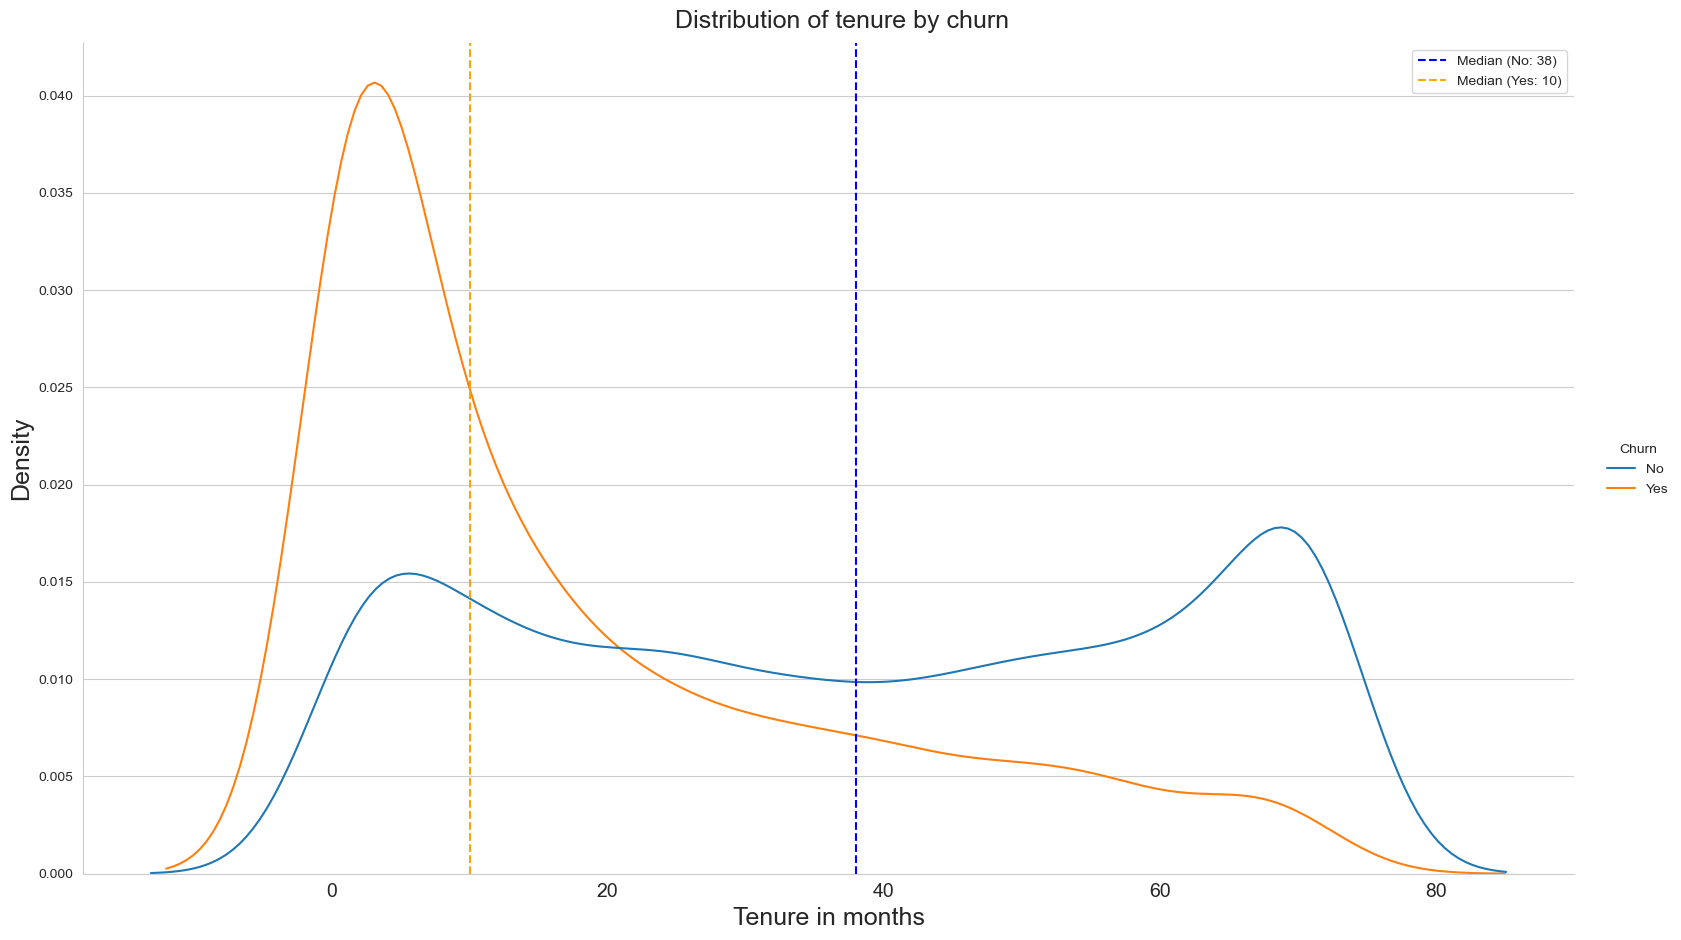

In [85]:
# Create the KDE plot
plot = sns.displot(df_initial, x="tenure", hue="Churn", kind="kde", common_norm=False, height=9, aspect=16/9)

# Access the underlying FacetGrid and set the title with a specific font size
plot.fig.suptitle("Distribution of tenure by churn", y=1.02, fontsize=18)

# Set labels for the axes
plot.set_axis_labels("Tenure in months", "Density", fontsize=18)

# Calculate median tenure for each churn group
median_tenure = df_initial.groupby('Churn')['tenure'].median()

# Get the axes object
ax = plot.axes[0,0]

# Plot vertical lines for median tenure in each group
for churn, median in median_tenure.items():
    if churn == 'Yes':
        ax.axvline(x=median, color='orange', linestyle='--', label=f'Median ({churn}: {median:.0f})')
    else:
        ax.axvline(x=median, color='blue', linestyle='--', label=f'Median ({churn}: {median:.0f})')

# Add legend
ax.legend()
# Increase the size of the x-axis labels
ax.tick_params(axis='x', labelsize=14)

plt.grid(False, axis="x")
# Save the plot as a PNG file using Matplotlib's savefig method
plt.savefig("Tenure_KDE_Plot.png", format="png")

# Show the plot (optional)
plt.show()


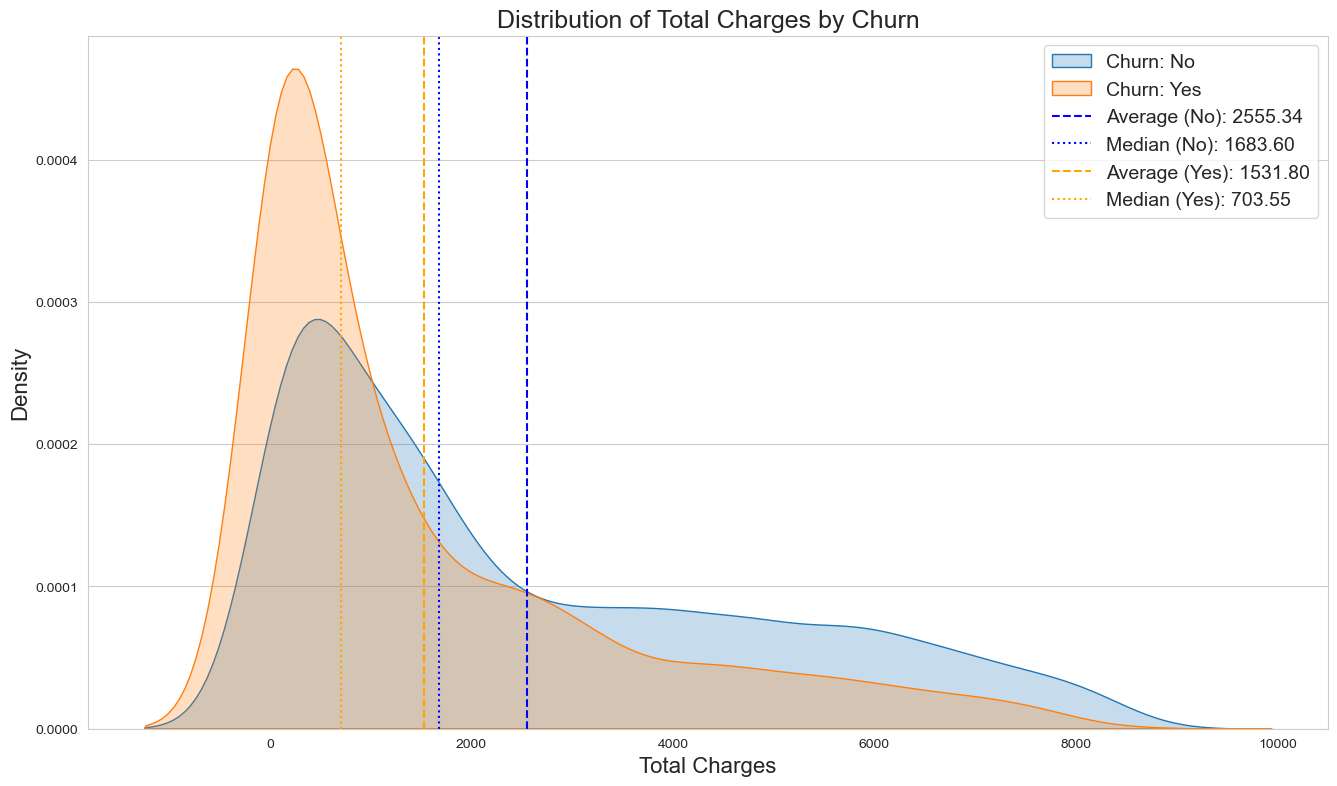

In [86]:
# Calculate average and median for both churn groups
average_no = df_initial[df_initial["Churn"] == "No"]["TotalCharges"].mean()
median_no = df_initial[df_initial["Churn"] == "No"]["TotalCharges"].median()

average_yes = df_initial[df_initial["Churn"] == "Yes"]["TotalCharges"].mean()
median_yes = df_initial[df_initial["Churn"] == "Yes"]["TotalCharges"].median()

# Create the KDE plot
plt.figure(figsize=(16, 9))
sns.kdeplot(df_initial[df_initial["Churn"] == "No"]["TotalCharges"], label="Churn: No", shade=True)
sns.kdeplot(df_initial[df_initial["Churn"] == "Yes"]["TotalCharges"], label="Churn: Yes", shade=True)

# Add vertical lines for average and median
plt.axvline(average_no, color='blue', linestyle='--', label=f'Average (No): {average_no:.2f}')
plt.axvline(median_no, color='blue', linestyle=':', label=f'Median (No): {median_no:.2f}')

plt.axvline(average_yes, color='orange', linestyle='--', label=f'Average (Yes): {average_yes:.2f}')
plt.axvline(median_yes, color='orange', linestyle=':', label=f'Median (Yes): {median_yes:.2f}')

# Set title and labels with increased fontsize
plt.title("Distribution of Total Charges by Churn", fontsize=18)
plt.xlabel("Total Charges", fontsize=16)
plt.ylabel("Density", fontsize=16)

# Add legend
plt.legend(fontsize=14)

# Remove grid lines and y-axis ticks
plt.grid(False, axis="x")


# Save the plot as a PNG file
plt.savefig("TotalCharges.png", format="png")

# Show the plot
plt.show()


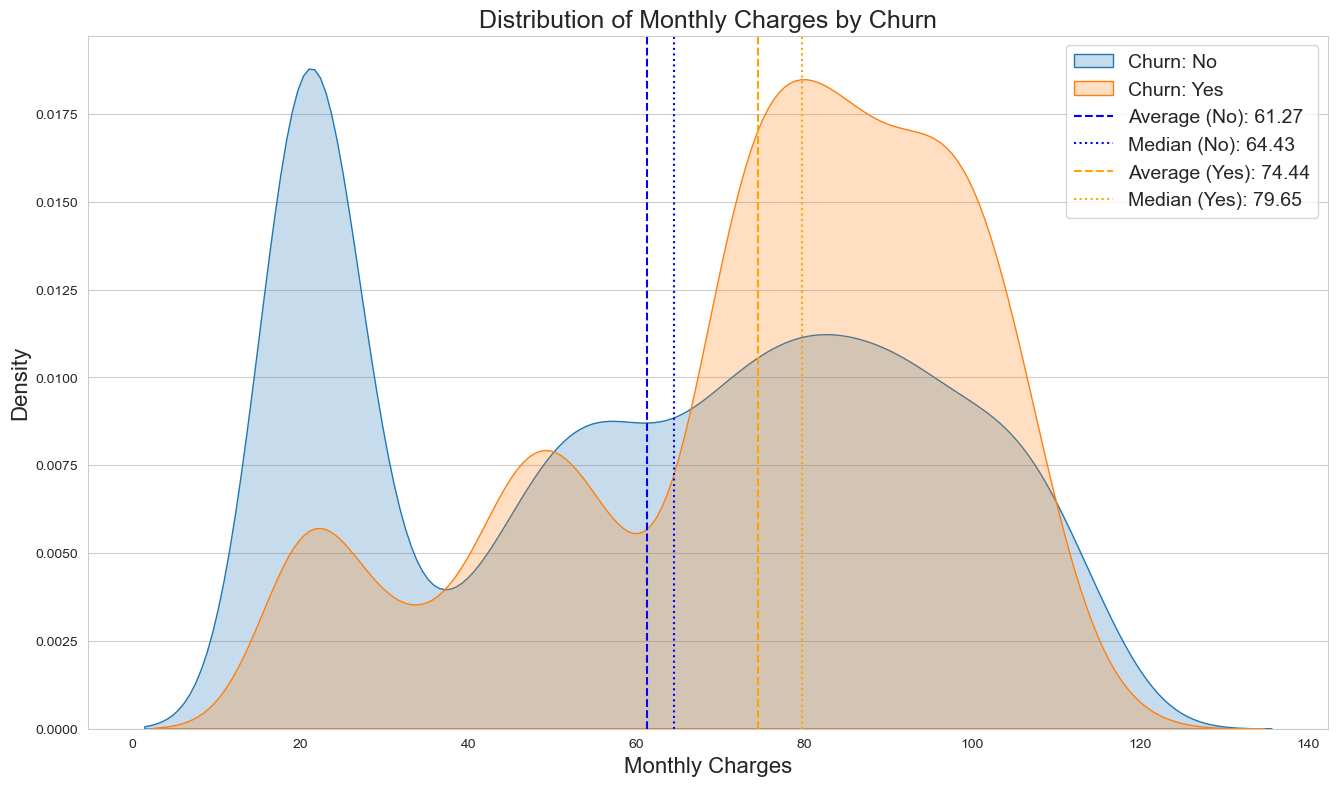

In [87]:
average_no = df_initial[df_initial["Churn"] == "No"]["MonthlyCharges"].mean()
median_no = df_initial[df_initial["Churn"] == "No"]["MonthlyCharges"].median()

average_yes = df_initial[df_initial["Churn"] == "Yes"]["MonthlyCharges"].mean()
median_yes = df_initial[df_initial["Churn"] == "Yes"]["MonthlyCharges"].median()

# Create the KDE plot
plt.figure(figsize=(16, 9))
sns.kdeplot(df_initial[df_initial["Churn"] == "No"]["MonthlyCharges"], label="Churn: No", shade=True)
sns.kdeplot(df_initial[df_initial["Churn"] == "Yes"]["MonthlyCharges"], label="Churn: Yes", shade=True)

# Add vertical lines for average and median
plt.axvline(average_no, color='blue', linestyle='--', label=f'Average (No): {average_no:.2f}')
plt.axvline(median_no, color='blue', linestyle=':', label=f'Median (No): {median_no:.2f}')

plt.axvline(average_yes, color='orange', linestyle='--', label=f'Average (Yes): {average_yes:.2f}')
plt.axvline(median_yes, color='orange', linestyle=':', label=f'Median (Yes): {median_yes:.2f}')
# Set title and labels with increased fontsize
plt.title("Distribution of Monthly Charges by Churn", fontsize=18)
plt.xlabel("Monthly Charges", fontsize=16)
plt.ylabel("Density", fontsize=16)

# Add legend
plt.legend(fontsize=14)

# Remove grid lines and y-axis ticks
plt.grid(False, axis="x")

# Save the plot as a PNG file
plt.savefig("MonthlyCharges.png", format="png")

# Show the plot
plt.show()


In [88]:
# Get categorical variable cols
df_dtype = pd.DataFrame(df_clean.dtypes, columns=["dtype"])
cat_vars = list(df_dtype[df_dtype.dtype=="object"].index)

In [89]:
# Map binary outcomes to 0 and 1
for column in cat_vars:
    if df_clean[column].nunique() == 2:
        df_clean[column] = df_clean[column].map({"No":0,"Male":0, 
                                                 "Yes":1,  "Female":1})
        
df_clean["Tenure_Bin"] = df_clean["Tenure_Bin"].values.astype("str")

In [90]:
# Map payment method to manuel and automatic
df_clean["PaymentMethod"] = df_clean["PaymentMethod"].map({"Electronic check":0, 
                                                           "Mailed check":0,
                                                  "Bank transfer (automatic)":1,
                                                           "Credit card (automatic)":1})
df_clean = df_clean.rename(columns={"PaymentMethod":"PaymentMethod_Automatic"})

In [91]:
unique_labels(df_clean)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod_Automatic: [0 1]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
Tenure_Bin: ['1' '3' '4' '2' '6' '5']


In [92]:
unique_labels(df_clean)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod_Automatic: [0 1]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
Tenure_Bin: ['1' '3' '4' '2' '6' '5']


## Data Visualization

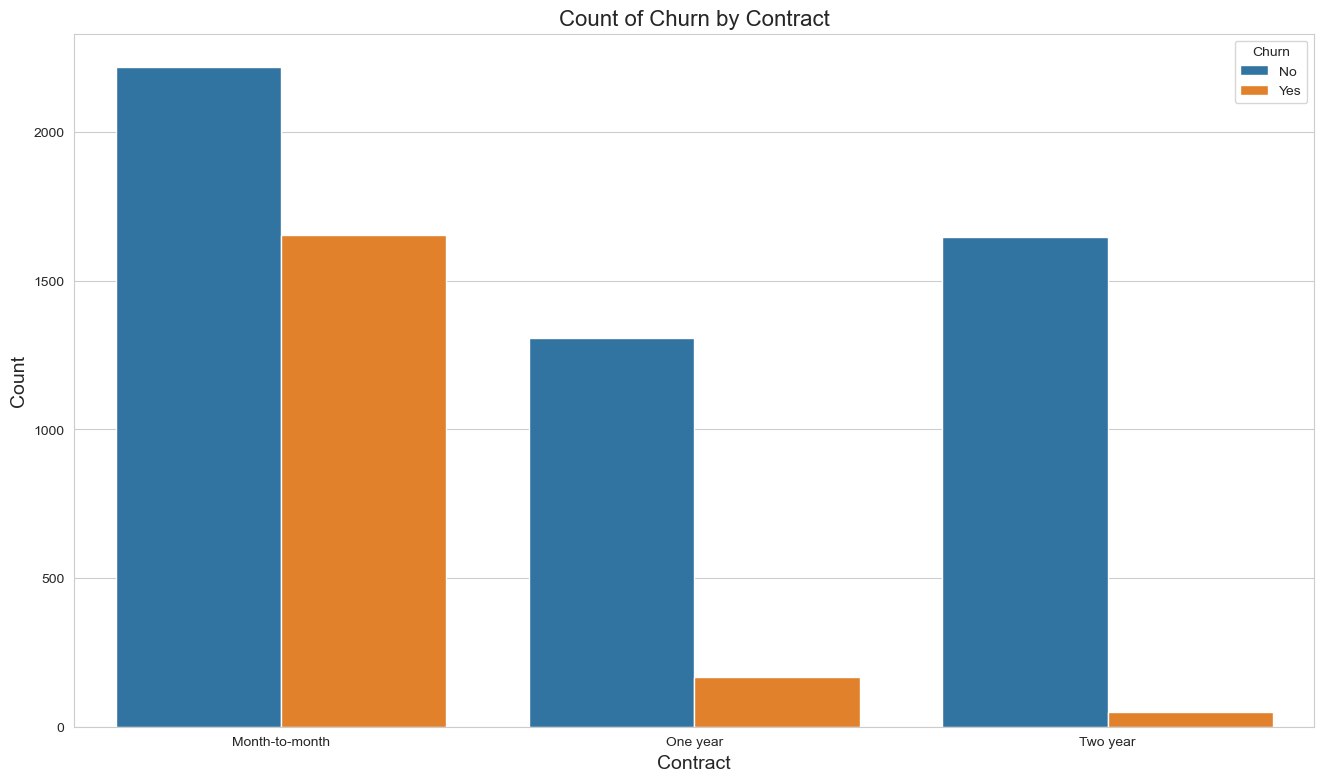

In [93]:
plt.figure(figsize=(16, 9))

# Create a count plot using Seaborn's countplot
sns.countplot(x="Contract", hue="Churn", data=df_initial)

# Set the labels and title
plt.xlabel('Contract', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Churn by Contract', fontsize=16)
#plt.yscale("log")
# Show the plot
plt.show()


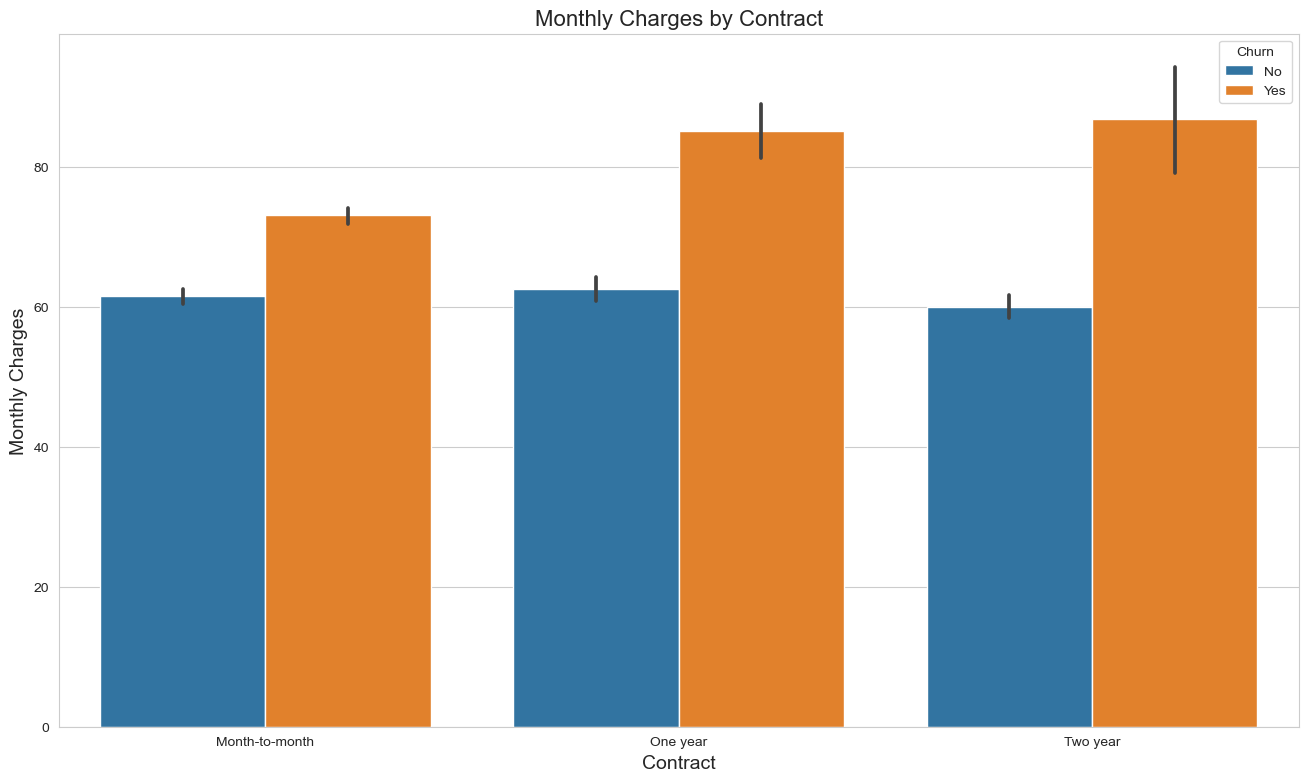

In [94]:
plt.figure(figsize=(16, 9))

# Create a count plot using Seaborn's countplot
sns.barplot(x="Contract", y="MonthlyCharges", hue="Churn", data=df_initial)

# Set the labels and title
plt.xlabel('Contract', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)
plt.title('Monthly Charges by Contract', fontsize=16)
#plt.yscale("log")
# Show the plot
plt.show()


In [97]:
# Create a scatter plot using Plotly Express
fig = px.scatter(df_initial, x="tenure", y="MonthlyCharges", color="Churn",
                 log_y=True, title="Monthly Charges for different Tenures")

# Set the figure size
fig.update_layout(width=900, height=600)  # Adjust width and height as needed

# Show the plot
fig.show()

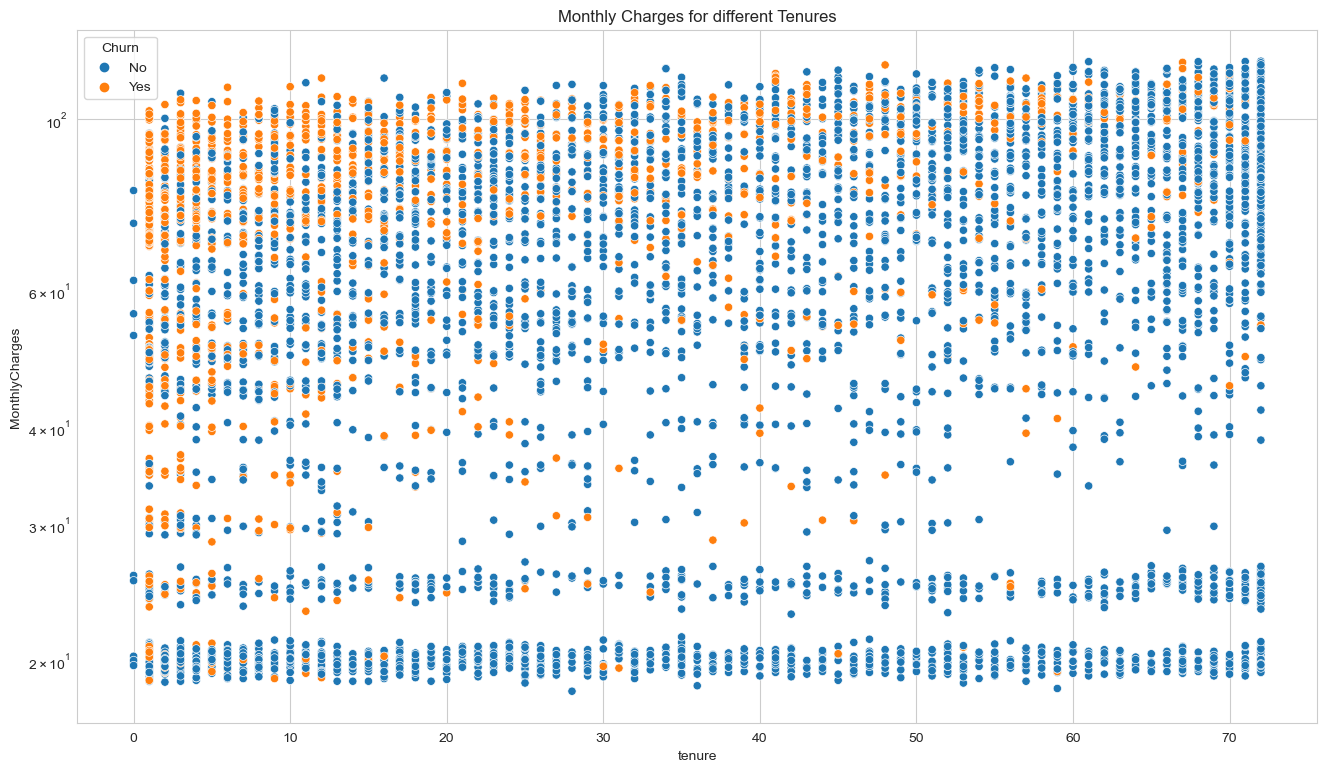

In [96]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x="tenure", y = "MonthlyCharges", hue="Churn", data=df_initial)
plt.yscale("log")
plt.title("Monthly Charges for different Tenures") 
plt.show()

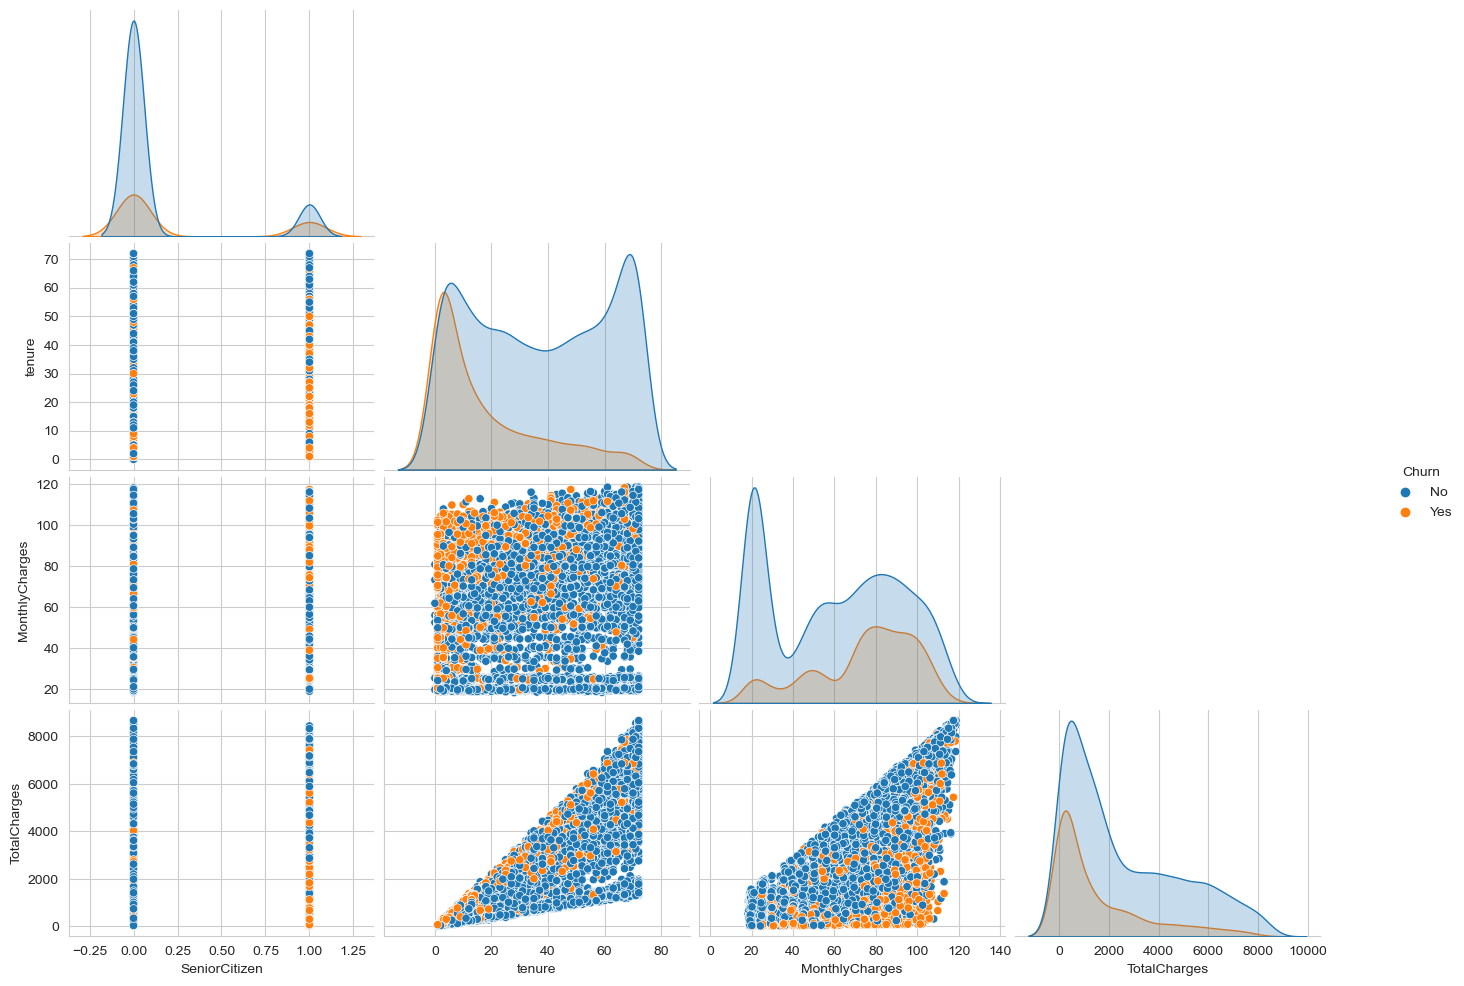

In [46]:
# Create a pairplot
g = sns.pairplot(df_initial, hue="Churn", corner=True)
g.fig.set_size_inches(15, 10)

# Set the context to control font sizes
sns.set_context("paper", rc={"axes.labelsize": 12, "legend.fontsize": 12})

# Show the plot
plt.show()


In [98]:
all_dtypes = pd.DataFrame(df_clean.dtypes).reset_index().rename(columns={0:"dtype"})
drop_col = all_dtypes[all_dtypes["index"]=="Churn"].index.values[0]

In [99]:
df_clean.isna().sum()
df_clean.dropna(inplace=True)

In [100]:
cat_df_col = all_dtypes[all_dtypes.dtype =="object"].index.values

pd.get_dummies(df_clean.iloc[:, cat_df_col]).columns

Index(['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Tenure_Bin_1', 'Tenure_Bin_2', 'Tenure_Bin_3',
       'Tenure_Bin_4', 'Tenure_Bin_5', 'Tenure_Bin_6'],
      dtype='object')

### Correlation Plot

In [101]:
corr_df = feature_corr(df_clean).reset_index()

# Create a horizontal bar plot using Plotly Express
fig = px.bar(corr_df, x="Churn", y="index", orientation="h",
             labels={"index": "Feature", "Churn": "Correlation with Churn"},
             title="Correlation of Features with Churn")
fig.update_layout(width=16*75, height=15*75, title=dict(x=0.5, text="Correlation of Features with Churn"),
                  xaxis_title="Correlation", yaxis_title="Feature")
fig.update_traces(width=0.25)
fig.add_trace(px.scatter(corr_df, x="Churn", y="index", color="Churn").data[0])
fig.show() 

In [102]:
multicol_cols = [
    "MultipleLines_No phone service", "OnlineSecurity_No internet service", "OnlineBackup_No", "MultipleLines_No",
    "OnlineSecurity_No", "DeviceProtection_No", "StreamingMovies_No", "StreamingTV_No", "TechSupport_No",
    'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
    'TechSupport_No internet service', 'StreamingTV_No internet service',
    'StreamingMovies_No internet service']
df_final = pd.get_dummies(df_clean).drop(columns=multicol_cols)
df_final.iloc[: ,10:] = df_final.iloc[: ,10:].astype(str).astype(int)

In [103]:
corr_df = feature_corr(df_final).reset_index()

# Create a horizontal bar plot using Plotly Express
fig = px.bar(corr_df, x="Churn", y="index", orientation="h",
             labels={"index": "Feature", "Churn": "Correlation with Churn"},
             title="Correlation of Features with Churn")
fig.update_layout(width=16*75, height=15*75, title=dict(x=0.5, text="Correlation of Features with Churn"),
                  xaxis_title="Correlation", yaxis_title="Feature")
fig.update_traces(width=0.25)
fig.add_trace(px.scatter(corr_df, x="Churn", y="index", color="Churn").data[0])
fig.show() 

### Drop Cols

In [104]:
multicol_cols = [
    "MultipleLines_No phone service", "OnlineSecurity_No internet service", "OnlineBackup_No", "MultipleLines_No",
    "OnlineSecurity_No", "DeviceProtection_No", "StreamingMovies_No", "StreamingTV_No", "TechSupport_No",
    'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
    'TechSupport_No internet service', 'StreamingTV_No internet service', "InternetService_No",
    'StreamingMovies_No internet service']
Reference_cols = ["Tenure_Bin_4", "Contract_Month-to-month", "InternetService_DSL"] 
drop_cols =  multicol_cols + Reference_cols 

In [105]:
data = df_clean
depend_var = [18]
#drop_cols = ["Churn"] + ["Contract_Two year", "Tenure_Bin_6", "InternetService_DSL"]
data.MonthlyCharges = StandardScaler().fit_transform(np.array(data.MonthlyCharges.values).reshape(-1, 1))
data.TotalCharges = StandardScaler().fit_transform(np.array(data.TotalCharges.values).reshape(-1, 1))

data_dummies = pd.get_dummies(data).drop(columns=multicol_cols)
data_labels = data_dummies.drop(columns="Churn")

X = data_dummies.values
y = data.iloc[:, depend_var].values

df_dtype = pd.DataFrame(data.drop(columns=data.iloc[:, (depend_var)].columns, index=1).dtypes)\
            .reset_index().rename(columns={0:"dtype"})

num_col = df_dtype[df_dtype.dtype =="float64"].index.values
cat_col = df_dtype[df_dtype.dtype =="object"].index.values
num_labels = list(df_dtype[df_dtype.dtype =="float64"]["index"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), cat_col), ('scaler', StandardScaler(), num_col)], 
#                      sparse_threshold=0,   remainder = 'passthrough')

#X_train = ct.fit_transform(X_train)
#X_test = ct.transform(X_test)
#X_all = ct.fit_transform(X)

In [52]:
fig_bar = px.bar(corr_df, x="Churn", y="index", orientation="h",
                 labels={"index": "Feature", "Churn": "Correlation with Churn"},
                 title="Correlation of Features with Churn")
fig_bar.update_layout(width=16*75, height=12*75, title=dict(x=0.5, text="Correlation of Features with Churn"),
                      xaxis_title="Correlation", yaxis_title="Feature")
fig_bar.update_traces(width=0.25)

# Scatter plot with color scale and colorbar
fig_scatter = px.scatter(corr_df, x="Churn", y="index", color="Churn", color_continuous_scale="temps")

# Create a combined figure using graph_objects
fig_combined = go.Figure()

# Add bar plot
for trace in fig_bar.data:
    fig_combined.add_trace(trace)

# Add scatter plot
scatter_trace = go.Scatter(x=corr_df["Churn"], y=corr_df["index"], mode="markers",
                           marker=dict(color=corr_df["Churn"], colorscale="temps"),
                           showlegend=False)

# Add colorbar with legend name
colorbar_trace = go.Scatter(x=[None], y=[None], mode='markers',
                            marker=dict(color=corr_df["Churn"], colorscale="temps"),
                            showlegend=True, legendgroup="color_scale",
                            hoverinfo='none', marker_colorbar=dict(title='Color Scale'))

# Set name to an empty string to remove the default legend name
colorbar_trace.name = ''

fig_combined.add_trace(scatter_trace)
fig_combined.add_trace(colorbar_trace)

# Update layout
fig_combined.update_layout(width=16*75, height=12*75, title=dict(x=0.5, text="Correlation of Features with Churn"),
                           xaxis_title="Correlation", yaxis_title="Feature",
                           legend=dict(tracegroupgap=0),
                           coloraxis_colorbar=dict(title='Color Scale'))

fig_combined.show()


## OLS and Naïve approach

In the following I will conduct a causal analysis to determine the real effect of the variable on the churn.
First I will use the naive approach, which consists of using OLS to calculate the impact of each variables on the probability of churn.

### Standard OLS

In [58]:
# multicol_cols = [
#     "MultipleLines_No phone service", "OnlineSecurity_No internet service", "OnlineBackup_No", "MultipleLines_No",
#     "OnlineSecurity_No", "DeviceProtection_No", "StreamingMovies_No", "StreamingTV_No", "TechSupport_No",
#     'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
#     'TechSupport_No internet service', 'StreamingTV_No internet service',
#     'StreamingMovies_No internet service', "Tenure_Bin_6", "Contract_Month-to-month", "InternetService_DSL", "Churn"
# ]

In [59]:
Reference_cols = ["Tenure_Bin_1", "Contract_Month-to-month", "InternetService_DSL"] 
X = data_dummies.drop(columns=["Churn"]+Reference_cols)
X = sm.add_constant(X)
Y = data_dummies.Churn
model = OLS(Y,X)
results = model.fit()
#results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     116.3
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:24:22   Log-Likelihood:                -3012.0
No. Observations:                7032   AIC:                             6076.
Df Residuals:                    7006   BIC:                             6254.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

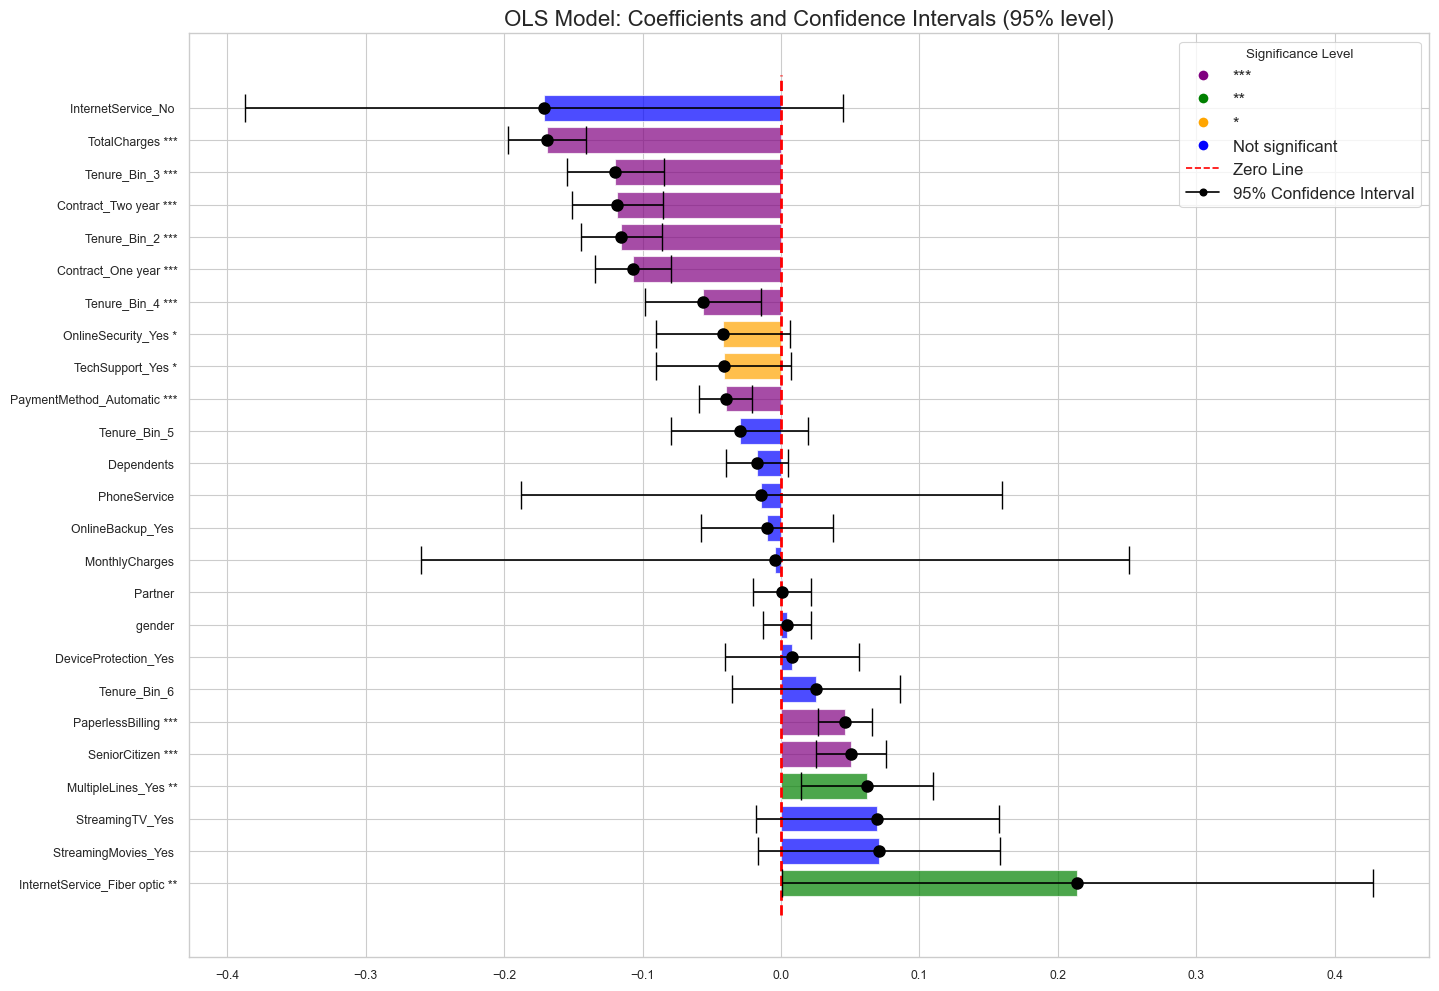

In [77]:
coefficients = results.params.drop("const")
conf_intervals = results.conf_int().drop("const")
p_values = results.pvalues.drop("const")

# Create a DataFrame for plotting
df_ols = pd.DataFrame({'Values': coefficients, 'Lower': conf_intervals.iloc[:, 0], 'Upper': conf_intervals.iloc[:, 1], 'p-values': p_values})

# Sort the DataFrame by Values for better visualization
df_ols = df_ols.sort_values(by="Values", ascending=False)

# Function to add significance stars
def add_significance_stars(p_value):
    if p_value < 0.01:
        return '***'
    elif p_value < 0.05:
        return '**'
    elif p_value < 0.1:
        return '*'
    else:
        return ''

# Add significance stars to the y-axis labels
df_ols['Labels'] = [f"{label} {add_significance_stars(p)}" for label, p in zip(df_ols.index, df_ols['p-values'])]

# Plotting
fig, ax = plt.subplots(figsize=(16, 12))

# Choose colors based on significance stars
bar_colors = ['purple' if add_significance_stars(p_value)=="***" 
              else 'green' if add_significance_stars(p_value)=="**"  
              else 'orange' if add_significance_stars(p_value)=="*"
              else 'blue' for p_value in df_ols['p-values']]
#errorbar_colors = ['r' if add_significance_stars(p_value) else 'b' for p_value in df_ols['p-values']]

ax.barh(df_ols['Labels'], df_ols["Values"].values, color=bar_colors, alpha=0.7, label='Coefficients')
ax.vlines(x=0, ymin=-1, ymax=len(df_ols), linewidth=2, color='r', linestyle='--', label='Zero Line')
ax.errorbar(x=df_ols["Values"], y=df_ols['Labels'], xerr=[df_ols["Values"] - df_ols["Lower"], df_ols["Upper"] - df_ols["Values"]],
            fmt='o', markersize=8, color='black', ecolor='black', capsize=10, label='95% Confidence Interval')

# Add legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8, label='***'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='**'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='*'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Not significant'),
                  plt.Line2D([0], [0], linestyle='--', color='r', label='Zero Line'),
                  plt.Line2D([0], [0], marker = 'o', color='black', label='95% Confidence Interval')]

ax.legend(handles=legend_handles, title='Significance Level', loc='upper right')

# Customize the plot
ax.set_title('OLS Model: Coefficients and Confidence Intervals (95% level)', fontdict={"fontsize":16})
#plt.savefig("OLS_coef.png", format="png")
plt.show()



In [76]:
Reference_cols = ["Tenure_Bin_1", "Contract_Month-to-month", "InternetService_DSL"] 
X = data_dummies.drop(columns=["Churn"]+Reference_cols)
X = sm.add_constant(X)
Y = data_dummies.Churn
model = OLS(Y,X)
results = model.fit()
#results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     116.3
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:26:44   Log-Likelihood:                -3012.0
No. Observations:                7032   AIC:                             6076.
Df Residuals:                    7006   BIC:                             6254.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Naïve Approach

In [291]:
dfs = []
for Treatment in data_labels:
    # Apply the function and append the DataFrame to the list
    dfs.append(Naive_app(Treatment))

# Concatenate the list of DataFrames into a single DataFrame
Naive_df = pd.concat(dfs)
Naive_df

,coef,std err,t,P>|t|,2.5 %,97.5 %
gender,0.0035,0.0057,0.6054,0.5449,-0.0077,0.0146
SeniorCitizen,0.1369,0.0075,18.1315,0.0000,0.1221,0.1517
Partner,-0.1331,0.0055,-24.2564,0.0000,-0.1438,-0.1223
Dependents,-0.1451,0.0060,-24.2214,0.0000,-0.1568,-0.1333
PhoneService,0.0176,0.0097,1.8207,0.0687,-0.0013,0.0365
PaperlessBilling,0.1345,0.0056,24.1322,0.0000,0.1236,0.1454
PaymentMethod_Automatic,-0.1547,0.0054,-28.4375,0.0000,-0.1654,-0.1440
MonthlyCharges,0.0852,0.0027,31.9300,0.0000,0.0800,0.0904
TotalCharges,-0.0720,0.0027,-27.1408,0.0000,-0.0772,-0.0668
MultipleLines_Yes,0.0270,0.0058,4.6657,0.0000,0.0156,0.0383


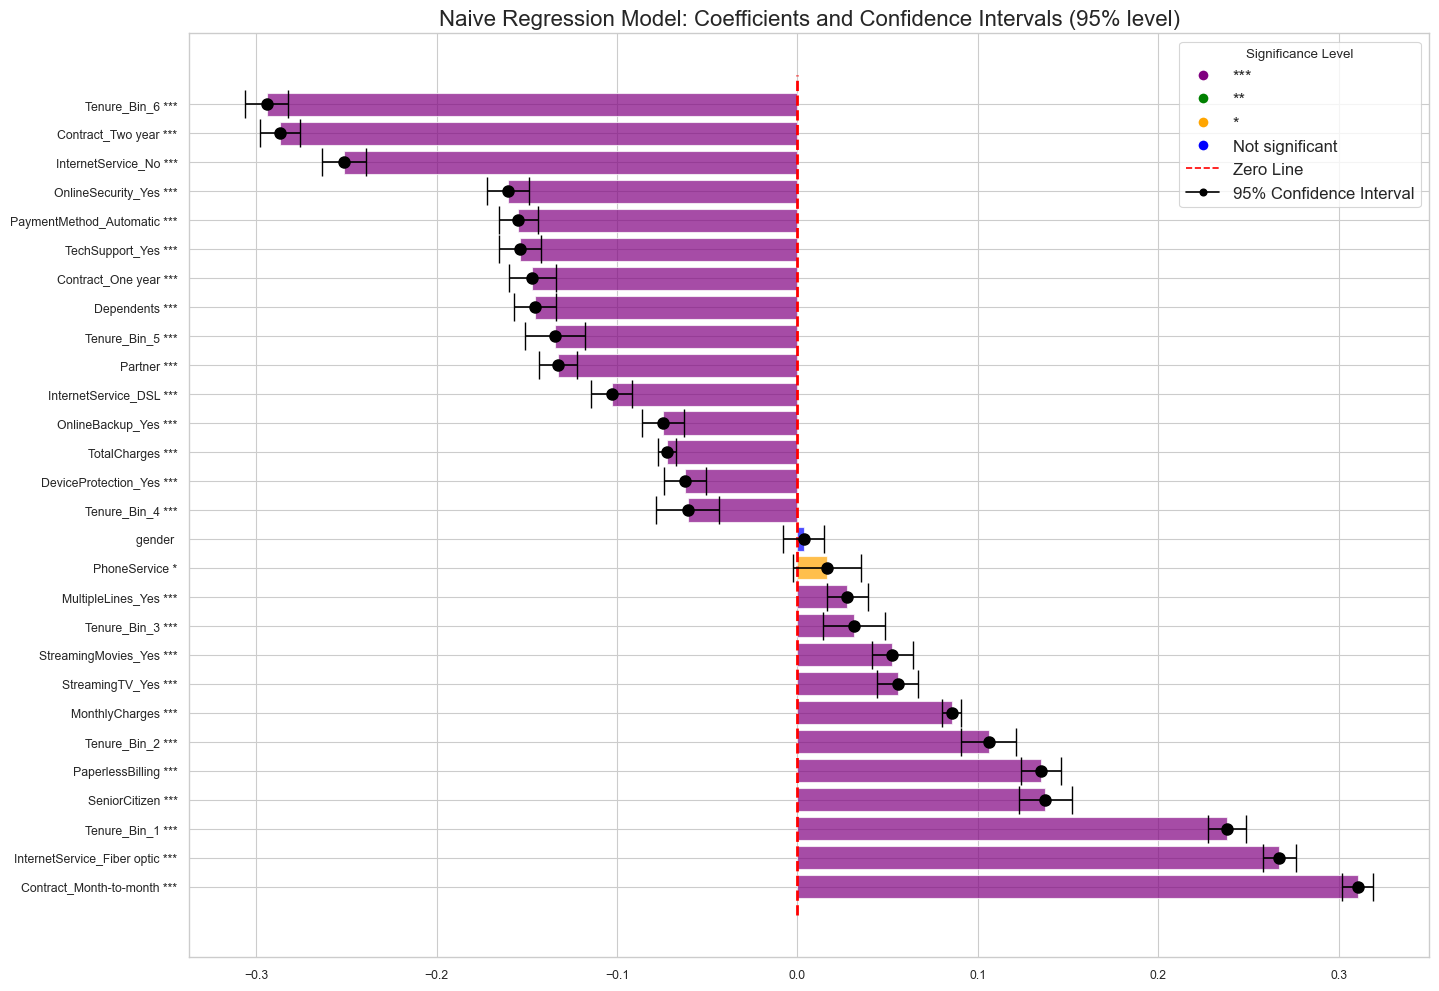

In [72]:
plot_coeff(Naive_df, "Naive Regression")

## Double ML

In [106]:
df_dml = pd.get_dummies(df_clean.copy(deep=True))

In [107]:
df_dml.drop(columns=multicol_cols, inplace=True)

In [108]:
df_dml.iloc[: ,10:] = df_dml.iloc[: ,10:].astype(str).astype(int)

In [109]:
#df_dml.dtypes

In [110]:
df_dml.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'PaymentMethod_Automatic', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'Tenure_Bin_1', 'Tenure_Bin_2', 'Tenure_Bin_3',
       'Tenure_Bin_4', 'Tenure_Bin_5', 'Tenure_Bin_6'],
      dtype='object')

In [113]:
dml_labels = list(df_dml.drop(columns=["Churn"]))

In [114]:
unique_labels(df_dml)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
PaperlessBilling: [1 0]
PaymentMethod_Automatic: [0 1]
MonthlyCharges: [-1.16169394 -0.26087792 -0.36392329 ... -0.05644919 -0.68469357
  0.46210172]
TotalCharges: [-0.99419409 -0.17373982 -0.95964911 ... -0.85451414 -0.87209546
  2.01234407]
Churn: [0 1]
MultipleLines_Yes: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
OnlineSecurity_Yes: [0 1]
OnlineBackup_Yes: [1 0]
DeviceProtection_Yes: [0 1]
TechSupport_Yes: [0 1]
StreamingTV_Yes: [0 1]
StreamingMovies_Yes: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
Tenure_Bin_1: [1 0]
Tenure_Bin_2: [0 1]
Tenure_Bin_3: [0 1]
Tenure_Bin_4: [0 1]
Tenure_Bin_5: [0 1]
Tenure_Bin_6: [0 1]


In [115]:
df_dml.MonthlyCharges = StandardScaler().fit_transform(np.array(df_dml.MonthlyCharges.values).reshape(-1, 1))
df_dml.TotalCharges = StandardScaler().fit_transform(np.array(df_dml.TotalCharges.values).reshape(-1, 1))


### Linear and Logistic Regression

In [92]:
LLR = []
for Treatment in dml_labels:
    LLR.append(dml_MLPLR_Linear(Treatment).values.tolist()[0])
#Double_Summary = pd.DataFrame(df_double_ML) 
columns = ["coef",  "std err",   "t",  "P>|t|",   "2.5 %",  "97.5 %", "ml_m", "ml_l"]
LLR_df = pd.DataFrame(LLR, index=dml_labels, columns=columns).round(4)
LLR_df

,coef,std err,t,P>|t|,2.5 %,97.5 %,ml_m,ml_l
gender,0.0041,0.0089,0.4653,0.6417,-0.0133,0.0216,0.3728,0.5002
SeniorCitizen,0.0466,0.0147,3.1732,0.0015,0.0178,0.0754,0.3755,0.3436
Partner,0.0018,0.0110,0.1665,0.8678,-0.0197,0.0233,0.3769,0.4150
Dependents,-0.0178,0.0107,-1.6654,0.0958,-0.0388,0.0032,0.3730,0.3853
PhoneService,0.0308,0.0514,0.5996,0.5488,-0.0700,0.1316,0.3729,0.0818
PaperlessBilling,0.0473,0.0097,4.8593,0.0000,0.0282,0.0664,0.3753,0.4505
PaymentMethod_Automatic,-0.0421,0.0096,-4.3621,0.0000,-0.0609,-0.0232,0.3741,0.4544
MonthlyCharges,0.0029,0.1312,0.0217,0.9827,-0.2543,0.2600,0.3728,0.0341
TotalCharges,-0.1690,0.0130,-13.0349,0.0000,-0.1945,-0.1436,0.3765,0.3118
MultipleLines_Yes,0.0209,0.0161,1.3034,0.1924,-0.0105,0.0524,0.3729,0.2737


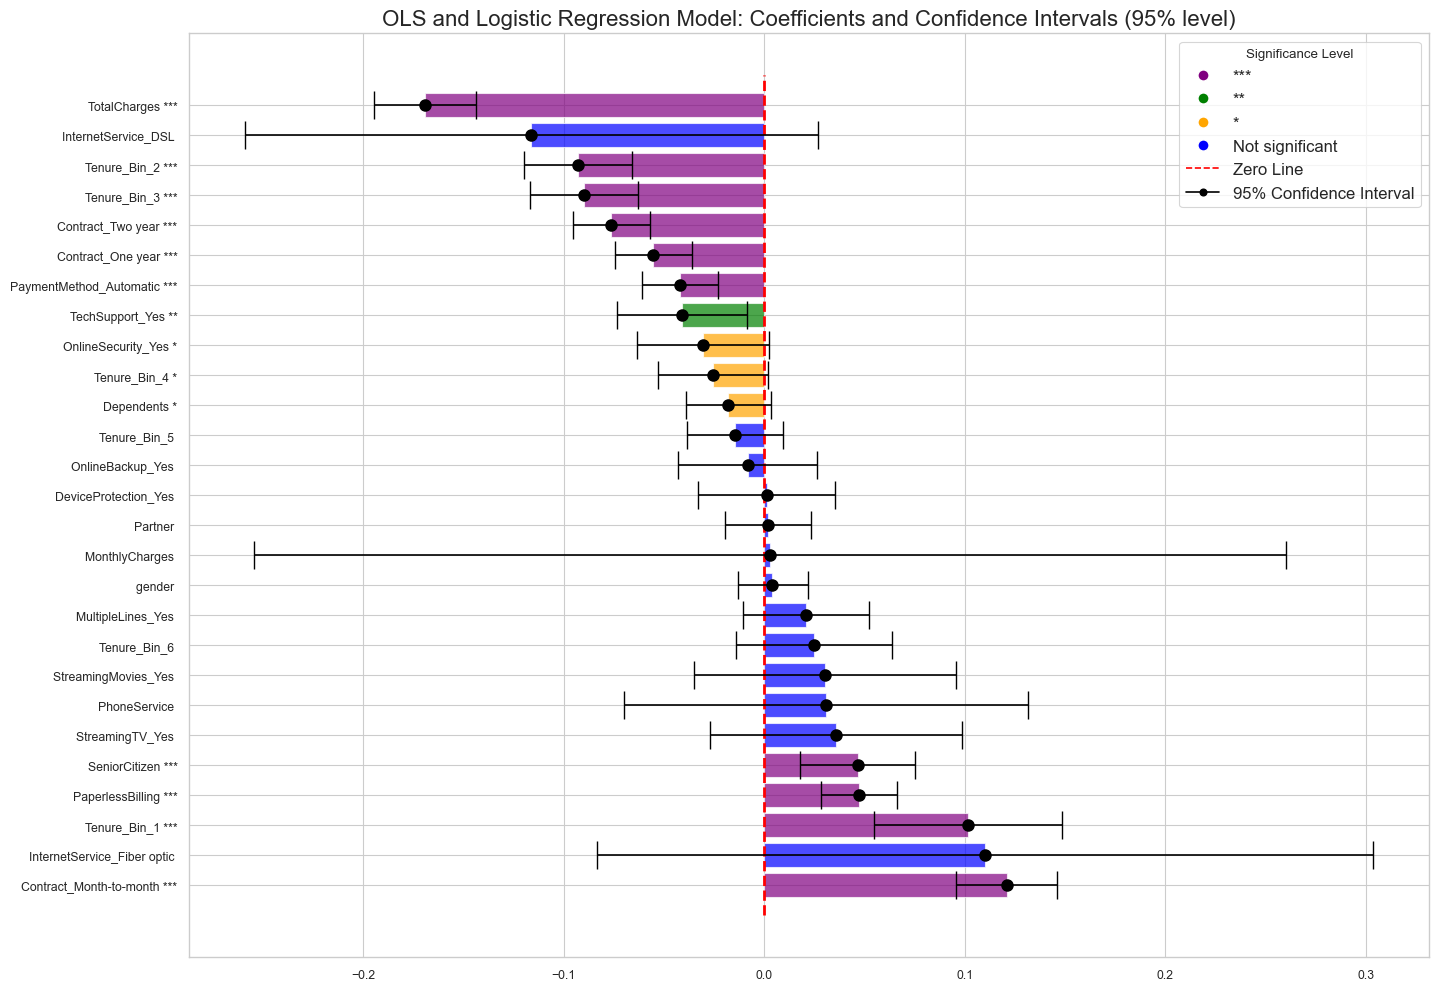

In [93]:
plot_coeff(LLR_df, "OLS and Logistic Regression")

### Decision Tree

In [ ]:
depnd = "Churn"
Treatment = "SeniorCitizen"
drop_cols_dml =find_similar_variables(dml_labels, [remove_underscore(Treatment)]) + [depnd]  + ["Tenure_Bin_4", "InternetService_DSL", "Contract_Month-to-month"]
x_labels =  list(df_dml.drop(columns=drop_cols_dml).columns.values)
data_dml_base = DoubleMLData(
    df_dml,
    y_col=depnd,
    d_cols=Treatment,
    x_cols=x_labels
        )

trees = DecisionTreeRegressor(
max_depth=30, ccp_alpha=0.005)
trees_class = DecisionTreeClassifier(
            max_depth=30, ccp_alpha=0.05)

np.random.seed(7)
dml_plr_tree = dml.DoubleMLPLR(data_dml_base,
                               ml_l = trees,
                               ml_m = trees_class,
                               n_folds = 5)
dml_plr_tree.fit(store_predictions=True)
tree_summary = dml_plr_tree.summary
print(dml_plr_tree)

In [122]:
LLR_df[LLR_df.coef < 0].index

Index(['Dependents', 'PaymentMethod_Automatic', 'TotalCharges',
       'InternetService_DSL', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'Contract_One year', 'Contract_Two year',
       'Tenure_Bin_2', 'Tenure_Bin_3', 'Tenure_Bin_4', 'Tenure_Bin_5'],
      dtype='object')

In [123]:
DT_df[DT_df.coef < 0].index

Index(['Dependents', 'PhoneService', 'PaymentMethod_Automatic',
       'MonthlyCharges', 'TotalCharges', 'InternetService_DSL',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year', 'Tenure_Bin_3',
       'Tenure_Bin_5', 'Tenure_Bin_6'],
      dtype='object')

In [115]:
DT = []
for Treatment in dml_labels:
    DT.append(dml_MLPLR_DT(Treatment).values.tolist()[0])

#columns = ["coef",  "std err ",   "t",  "P>|t|",   "2.5 %",  "97.5 %", "ml_m", "ml_l"]
DT_df = pd.DataFrame(DT, index=dml_labels, columns=columns).round(3)
DT_df

,coef,std err,t,P>|t|,2.5 %,97.5 %,ml_m,ml_l
gender,0.006,0.009,0.699,0.485,-0.011,0.024,0.377,0.500
SeniorCitizen,0.055,0.014,4.010,0.000,0.028,0.082,0.377,0.369
Partner,0.009,0.010,0.898,0.369,-0.011,0.029,0.377,0.446
Dependents,-0.031,0.010,-3.034,0.002,-0.051,-0.011,0.377,0.408
PhoneService,-0.058,0.016,-3.738,0.000,-0.089,-0.028,0.378,0.296
PaperlessBilling,0.058,0.009,6.255,0.000,0.040,0.076,0.377,0.471
PaymentMethod_Automatic,-0.033,0.009,-3.675,0.000,-0.051,-0.016,0.377,0.482
MonthlyCharges,-0.104,0.033,-3.146,0.002,-0.169,-0.039,0.376,0.140
TotalCharges,-0.132,0.033,-4.021,0.000,-0.196,-0.068,0.379,0.139
MultipleLines_Yes,0.028,0.010,2.761,0.006,0.008,0.048,0.378,0.429


In [267]:
print("Average rmse for ml_m", DT_df["ml_m"].mean())

Average rmse for ml_m 0.3776666666666667


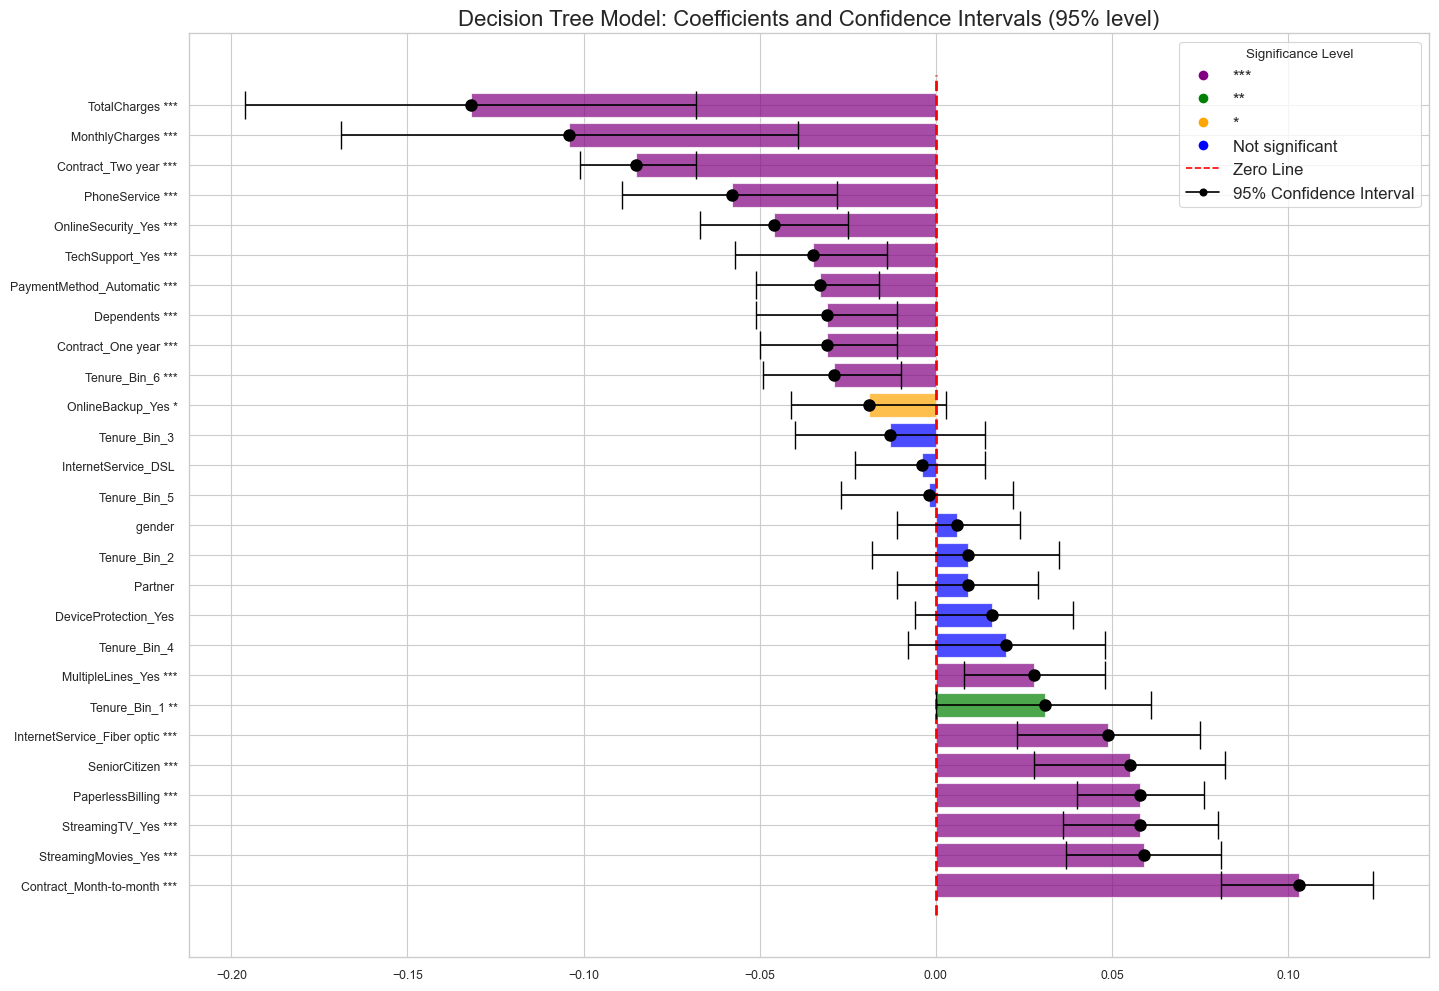

In [116]:
plot_coeff(DT_df, "Decision Tree")

### Random Forest

In [150]:
RF = []
for Treatment in dml_labels:
    RF.append(dml_MLPLR_RF(Treatment).values.tolist()[0])

columns = ["coef",  "std err",   "t",  "P>|t|",   "2.5 %",  "97.5 %", "ml_m", "ml_l"]
RF_df = pd.DataFrame(RF, index=dml_labels, columns=columns).round(4)
RF_df

,coef,std err,t,P>|t|,2.5 %,97.5 %,ml_m,ml_l
gender,0.0053,0.0088,0.6027,0.5467,-0.0119,0.0226,0.3698,0.5001
SeniorCitizen,0.0436,0.0144,3.0186,0.0025,0.0153,0.0719,0.3698,0.3450
Partner,0.0038,0.0106,0.3625,0.7170,-0.0169,0.0246,0.3695,0.4200
Dependents,-0.0164,0.0104,-1.5821,0.1136,-0.0368,0.0039,0.3695,0.3928
PhoneService,-0.0545,0.0175,-3.1096,0.0019,-0.0888,-0.0201,0.3717,0.2562
PaperlessBilling,0.0484,0.0095,5.0745,0.0000,0.0297,0.0671,0.3703,0.4508
PaymentMethod_Automatic,-0.0337,0.0096,-3.4965,0.0005,-0.0525,-0.0148,0.3701,0.4527
MonthlyCharges,0.0655,0.0339,1.9338,0.0531,-0.0009,0.1320,0.3704,0.1388
TotalCharges,-0.1690,0.0207,-8.1515,0.0000,-0.2096,-0.1283,0.3734,0.2228
MultipleLines_Yes,0.0352,0.0103,3.4151,0.0006,0.0150,0.0553,0.3714,0.4270


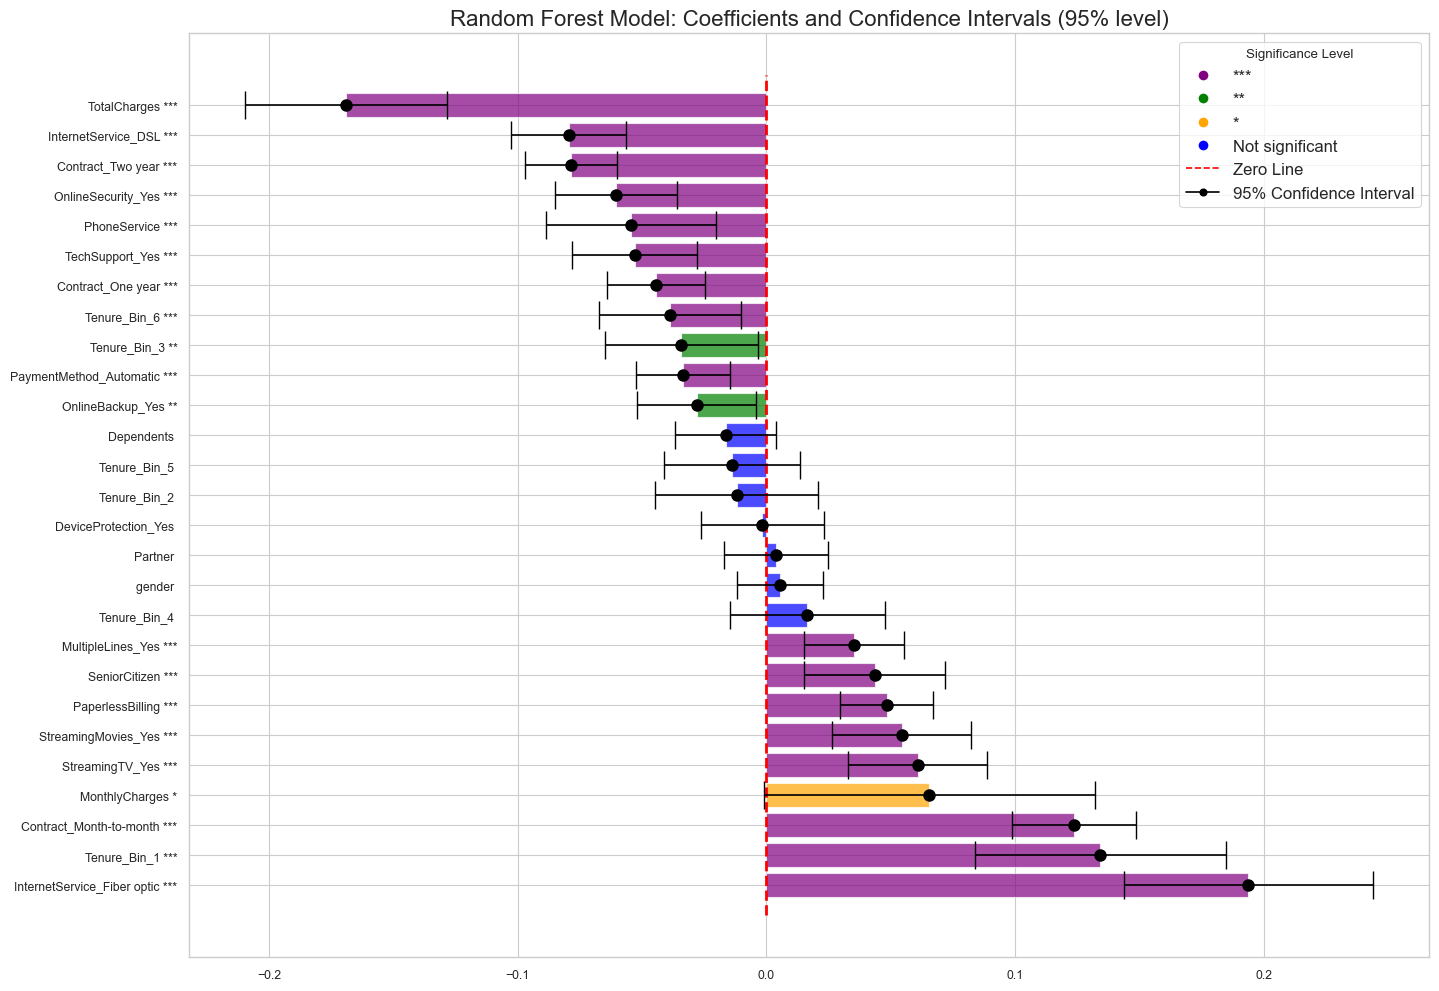

In [151]:
plot_coeff(RF_df, "Random Forest")

In [701]:
RF_df[RF_df.coef >0].sort_values(by="coef")

,coef,std err,t,P>|t|,2.5 %,97.5 %,ml_m,ml_l
Partner,0.0038,0.0106,0.3625,0.7170,-0.0169,0.0246,0.3695,0.4200
gender,0.0053,0.0088,0.6027,0.5467,-0.0119,0.0226,0.3698,0.5001
Tenure_Bin_4,0.0165,0.0159,1.0356,0.3004,-0.0147,0.0476,0.3707,0.2671
SeniorCitizen,0.0436,0.0144,3.0186,0.0025,0.0153,0.0719,0.3698,0.3450
PaperlessBilling,0.0484,0.0095,5.0745,0.0000,0.0297,0.0671,0.3703,0.4508
MultipleLines_Yes,0.0521,0.0127,4.1093,0.0000,0.0272,0.0769,0.3699,0.3624
StreamingMovies_Yes,0.0544,0.0143,3.8016,0.0001,0.0264,0.0825,0.3697,0.3187
StreamingTV_Yes,0.0608,0.0143,4.2693,0.0000,0.0329,0.0888,0.3699,0.3181
MonthlyCharges,0.0655,0.0339,1.9338,0.0531,-0.0009,0.1320,0.3704,0.1388
Contract_Month-to-month,0.1239,0.0127,9.7239,0.0000,0.0989,0.1488,0.3723,0.3284


### XGBoost

In [152]:
XGB = []
for Treatment in dml_labels:
    XGB.append(dml_MLPLR_xgboost(Treatment).values.tolist()[0])

columns = ["coef",  "std err",   "t",  "P>|t|",   "2.5 %",  "97.5 %", "ml_m", "ml_l"]
XGB_df = pd.DataFrame(XGB, index=dml_labels, columns=columns).round(4)
XGB_df

,coef,std err,t,P>|t|,2.5 %,97.5 %,ml_m,ml_l
gender,0.0024,0.0089,0.2728,0.7850,-0.0149,0.0198,0.3719,0.5006
SeniorCitizen,0.0473,0.0138,3.4226,0.0006,0.0202,0.0744,0.3725,0.3556
Partner,0.0026,0.0107,0.2436,0.8075,-0.0183,0.0235,0.3716,0.4189
Dependents,-0.0169,0.0107,-1.5828,0.1135,-0.0378,0.0040,0.3716,0.3919
PhoneService,-0.0671,0.0331,-2.0265,0.0427,-0.1319,-0.0022,0.3719,0.1321
PaperlessBilling,0.0478,0.0095,5.0193,0.0000,0.0291,0.0665,0.3725,0.4564
PaymentMethod_Automatic,-0.0276,0.0096,-2.8659,0.0042,-0.0465,-0.0087,0.3716,0.4569
MonthlyCharges,0.1034,0.0559,1.8487,0.0645,-0.0062,0.2130,0.3716,0.0725
TotalCharges,-0.2497,0.0360,-6.9428,0.0000,-0.3202,-0.1792,0.3770,0.1283
MultipleLines_Yes,0.0515,0.0134,3.8369,0.0001,0.0252,0.0779,0.3718,0.3451


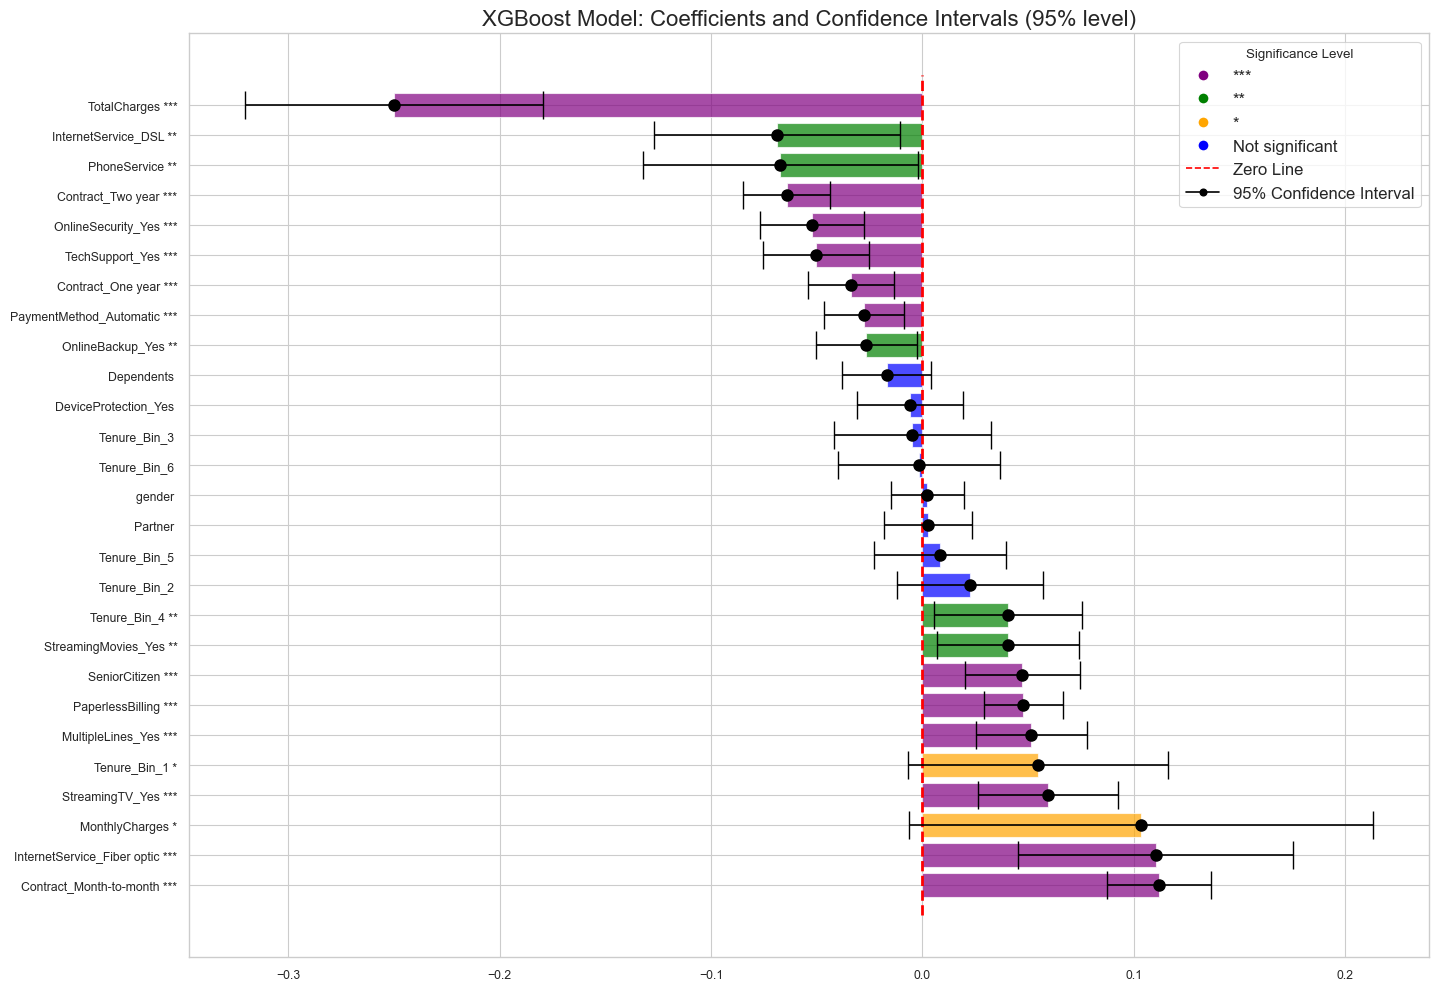

In [153]:
plot_coeff(XGB_df, "XGBoost")

### Summary

In [292]:
Model_names = ["OLS + Logit", "Decision Tree", "Random Forest", "XGBoost"]
Models = [Naive_df, LLR_df, DT_df, RF_df, XGB_df]
Models2 = ["Naive_df2", "LLR_df2", "DT_df2", "RF_df2", "XGB_df2"]


In [293]:
for i in range(len(Models2)):
    Models2[i] = Models[i].copy()
    Models2[i]['coef'] = [f"{coef} {add_significance_stars(p)}" for coef, p in zip(Models2[i]["coef"],
                                                                                   Models2[i]['P>|t|'])]
    Models2[i]['P>|t|'] = '(' + Models2[i]['P>|t|'].astype(str) + ')'
    Models2[i]['coef'].replace({True: '<sup>*</sup>', False: ''})
    Models2[i].sort_values(by="coef")

In [294]:

Summary_df = pd.concat([Models2[0][['coef', 'P>|t|']], Models2[1][['coef', 'P>|t|']],
                        Models2[2][['coef', 'P>|t|']], Models2[3][['coef', 'P>|t|']], 
                        Models2[4][['coef', 'P>|t|']]], 
                      axis=1, keys=["Naive", "OLS + Logit", "Decision Tree", "Random Forest", "XGBoost"])
Summary_df = Summary_df.stack()
Summary_df.sort_values(by="OLS + Logit")
Summary_df.to_excel("summary3.xlsx")
Summary_df

Naive  OLS + Logit Decision Tree  \
gender                      coef       0.0035       0.0041         0.006    
                            P>|t|     (0.5449)     (0.6417)       (0.485)   
SeniorCitizen               coef    0.1369 ***   0.0466 ***     0.055 ***   
                            P>|t|        (0.0)     (0.0015)         (0.0)   
Partner                     coef   -0.1331 ***      0.0018         0.009    
                            P>|t|        (0.0)     (0.8678)       (0.369)   
Dependents                  coef   -0.1451 ***    -0.0178 *    -0.031 ***   
                            P>|t|        (0.0)     (0.0958)       (0.002)   
PhoneService                coef      0.0176 *      0.0308     -0.058 ***   
                            P>|t|     (0.0687)     (0.5488)         (0.0)   
PaperlessBilling            coef    0.1345 ***   0.0473 ***     0.058 ***   
                            P>|t|        (0.0)        (0.0)         (0.0)   
PaymentMethod_Automatic     coef   -0.1547 ***  -0.0421 ***    -0.033 ***   
                            P>|t|        (0.0)        (0.0)         (0.0)   
MonthlyCharges              coef    0.0852 ***      0.0029     -0.104 ***   
                            P>|t|        (0.0)     (0.9827)       (0.002)   
TotalCharges                coef    -0.072 ***   -0.169 ***    -0.132 ***   
                            P>|t|        (0.0)        (0.0)         (0.0)   
MultipleLines_Yes           coef     0.027 ***      0.0209      0.028 ***   
                            P>|t|        (0.0)     (0.1924)       (0.006)   
InternetService_DSL         coef   -0.1031 ***      -0.116        -0.004    
                            P>|t|        (0.0)      (0.111)        (0.64)   
InternetService_Fiber optic coef    0.2672 ***      0.1099      0.049 ***   
                            P>|t|        (0.0)     (0.2655)         (0.0)   
OnlineSecurity_Yes          coef   -0.1607 ***    -0.0303 *    -0.046 ***   
                            P>|t|        (0.0)     (0.0713)         (0.0)   
OnlineBackup_Yes            coef    -0.075 ***     -0.0082       -0.019 *   
                            P>|t|        (0.0)     (0.6421)       (0.087)   
DeviceProtection_Yes        coef   -0.0627 ***      0.0012         0.016    
                            P>|t|        (0.0)     (0.9456)       (0.156)   
TechSupport_Yes             coef   -0.1539 ***    -0.041 **    -0.035 ***   
                            P>|t|        (0.0)     (0.0135)       (0.001)   
StreamingTV_Yes             coef    0.0546 ***      0.0358      0.058 ***   
                            P>|t|        (0.0)     (0.2649)         (0.0)   
StreamingMovies_Yes         coef    0.0522 ***      0.0303      0.059 ***   
                            P>|t|        (0.0)     (0.3625)         (0.0)   
Contract_Month-to-month     coef    0.3105 ***   0.1208 ***     0.103 ***   
                            P>|t|        (0.0)        (0.0)         (0.0)   
Contract_One year           coef    -0.147 ***  -0.0552 ***    -0.031 ***   
                            P>|t|        (0.0)        (0.0)       (0.002)   
Contract_Two year           coef   -0.2867 ***  -0.0763 ***    -0.085 ***   
                            P>|t|        (0.0)        (0.0)         (0.0)   
Tenure_Bin_1                coef    0.2376 ***   0.1015 ***      0.031 **   
                            P>|t|        (0.0)        (0.0)       (0.049)   
Tenure_Bin_2                coef     0.106 ***  -0.0927 ***        0.009    
                            P>|t|        (0.0)        (0.0)       (0.527)   
Tenure_Bin_3                coef    0.0316 ***  -0.0897 ***       -0.013    
                            P>|t|     (0.0003)        (0.0)       (0.356)   
Tenure_Bin_4                coef   -0.0605 ***    -0.0255 *         0.02    
                            P>|t|        (0.0)     (0.0666)       (0.157)   
Tenure_Bin_5                coef   -0.1339 ***     -0.0144        -0.002    
                            P>|t|    

## Correlation Senior Citizen with other factors

In [119]:
df_dml.groupby(["SeniorCitizen",  "TechSupport_Yes"]).count()/df_dml.groupby(["SeniorCitizen"]).count()

Churn  Contract_Month-to-month  \
SeniorCitizen TechSupport_Yes                                      
0             0                0.697793                 0.697793   
              1                0.302207                 0.302207   
1             0                0.772329                 0.772329   
              1                0.227671                 0.227671   

                               Contract_One year  Contract_Two year  \
SeniorCitizen TechSupport_Yes                                         
0             0                         0.697793           0.697793   
              1                         0.302207           0.302207   
1             0                         0.772329           0.772329   
              1                         0.227671           0.227671   

                               Dependents  DeviceProtection_Yes  \
SeniorCitizen TechSupport_Yes                                     
0             0                  0.697793              0.697793   
              1                  0.302207              0.302207   
1             0                  0.772329              0.772329   
              1                  0.227671              0.227671   

                               InternetService_DSL  \
SeniorCitizen TechSupport_Yes                        
0             0                           0.697793   
              1                           0.302207   
1             0                           0.772329   
              1                           0.227671   

                               InternetService_Fiber optic  MonthlyCharges  \
SeniorCitizen TechSupport_Yes                                                
0             0                                   0.697793        0.697793   
              1                                   0.302207        0.302207   
1             0                                   0.772329        0.772329   
              1                                   0.227671        0.227671   

                               MultipleLines_Yes  ...  StreamingTV_Yes  \
SeniorCitizen TechSupport_Yes                     ...                    
0             0                         0.697793  ...         0.697793   
              1                         0.302207  ...         0.302207   
1             0                         0.772329  ...         0.772329   
              1                         0.227671  ...         0.227671   

                               TechSupport_Yes  Tenure_Bin_1  Tenure_Bin_2  \
SeniorCitizen TechSupport_Yes                                                
0             0                            NaN      0.697793      0.697793   
              1                            NaN      0.302207      0.302207   
1             0                            NaN      0.772329      0.772329   
              1                            NaN      0.227671      0.227671   

                               Tenure_Bin_3  Tenure_Bin_4  Tenure_Bin_5  \
SeniorCitizen TechSupport_Yes                                             
0             0                    0.697793      0.697793      0.697793   
              1                    0.302207      0.302207      0.302207   
1             0                    0.772329      0.772329      0.772329   
              1                    0.227671      0.227671      0.227671   

                               Tenure_Bin_6  TotalCharges    gender  
SeniorCitizen TechSupport_Yes                                        
0             0                    0.697793      0.697793  0.697793  
              1                    0.302207      0.302207  0.302207  
1             0                    0.772329      0.772329  0.772329  
              1                    0.227671      0.227671  0.227671  

[4 rows x 27 columns]

In [331]:
df_dml.groupby(["SeniorCitizen", "Churn", "TechSupport_Yes"]).count()/df_dml.groupby(["SeniorCitizen", "Churn"]).count()

Contract_Month-to-month  \
SeniorCitizen Churn TechSupport_Yes                            
0             0     0                               0.661775   
                    1                               0.338225   
              1     0                               0.814070   
                    1                               0.185930   
1             0     0                               0.686186   
                    1                               0.313814   
              1     0                               0.892857   
                    1                               0.107143   

                                     Contract_One year  Contract_Two year  \
SeniorCitizen Churn TechSupport_Yes                                         
0             0     0                         0.661775           0.661775   
                    1                         0.338225           0.338225   
              1     0                         0.814070           0.814070   
                    1                         0.185930           0.185930   
1             0     0                         0.686186           0.686186   
                    1                         0.313814           0.313814   
              1     0                         0.892857           0.892857   
                    1                         0.107143           0.107143   

                                     Dependents  DeviceProtection_Yes  \
SeniorCitizen Churn TechSupport_Yes                                     
0             0     0                  0.661775              0.661775   
                    1                  0.338225              0.338225   
              1     0                  0.814070              0.814070   
                    1                  0.185930              0.185930   
1             0     0                  0.686186              0.686186   
                    1                  0.313814              0.313814   
              1     0                  0.892857              0.892857   
                    1                  0.107143              0.107143   

                                     InternetService_DSL  \
SeniorCitizen Churn TechSupport_Yes                        
0             0     0                           0.661775   
                    1                           0.338225   
              1     0                           0.814070   
                    1                           0.185930   
1             0     0                           0.686186   
                    1                           0.313814   
              1     0                           0.892857   
                    1                           0.107143   

                                     InternetService_Fiber optic  \
SeniorCitizen Churn TechSupport_Yes                                
0             0     0                                   0.661775   
                    1                                   0.338225   
              1     0                                   0.814070   
                    1                                   0.185930   
1             0     0                                   0.686186   
                    1                                   0.313814   
              1     0                                   0.892857   
                    1                                   0.107143   

                                     InternetService_No  MonthlyCharges  \
SeniorCitizen Churn TechSupport_Yes                                       
0             0     0                          0.661775        0.661775   
                    1                          0.338225        0.338225   
              1     0                          0.814070        0.814070   
                    1                          0.185930        0.185930   
1             0     0                          0.686186        0.686186   
                    1                          0.313814        0.313814   
            

In [120]:
df_dml.groupby(["SeniorCitizen", "Churn", "Contract_Month-to-month"]).count()/df_dml.groupby(["SeniorCitizen", "Churn"]).count()

Contract_Month-to-month  \
SeniorCitizen Churn Contract_Month-to-month                            
0             0     0                                            NaN   
                    1                                            NaN   
              1     0                                            NaN   
                    1                                            NaN   
1             0     0                                            NaN   
                    1                                            NaN   
              1     0                                            NaN   
                    1                                            NaN   

                                             Contract_One year  \
SeniorCitizen Churn Contract_Month-to-month                      
0             0     0                                 0.587725   
                    1                                 0.412275   
              1     0                                 0.128500   
                    1                                 0.871500   
1             0     0                                 0.450450   
                    1                                 0.549550   
              1     0                                 0.073529   
                    1                                 0.926471   

                                             Contract_Two year  Dependents  \
SeniorCitizen Churn Contract_Month-to-month                                  
0             0     0                                 0.587725    0.587725   
                    1                                 0.412275    0.412275   
              1     0                                 0.128500    0.128500   
                    1                                 0.871500    0.871500   
1             0     0                                 0.450450    0.450450   
                    1                                 0.549550    0.549550   
              1     0                                 0.073529    0.073529   
                    1                                 0.926471    0.926471   

                                             DeviceProtection_Yes  \
SeniorCitizen Churn Contract_Month-to-month                         
0             0     0                                    0.587725   
                    1                                    0.412275   
              1     0                                    0.128500   
                    1                                    0.871500   
1             0     0                                    0.450450   
                    1                                    0.549550   
              1     0                                    0.073529   
                    1                                    0.926471   

                                             InternetService_DSL  \
SeniorCitizen Churn Contract_Month-to-month                        
0             0     0                                   0.587725   
                    1                                   0.412275   
              1     0                                   0.128500   
                    1                                   0.871500   
1             0     0                                   0.450450   
                    1                                   0.549550   
              1     0                                   0.073529   
                    1                                   0.926471   

                                             InternetService_Fiber optic  \
SeniorCitizen Churn Contract_Month-to-month                                
0             0     0                                           0.587725   
                    1                                           0.412275   
              1     0                                           0.128500   
                    1                                           0.871500   
1             0     0                                 

In [329]:
df_dml.groupby(["SeniorCitizen", "Churn", "InternetService_Fiber optic"]).count()/df_dml.groupby(["SeniorCitizen", "Churn"]).count()

Contract_Month-to-month  \
SeniorCitizen Churn InternetService_Fiber optic                            
0             0     0                                           0.697354   
                    1                                           0.302646   
              1     0                                           0.351041   
                    1                                           0.648959   
1             0     0                                           0.342342   
                    1                                           0.657658   
              1     0                                           0.174370   
                    1                                           0.825630   

                                                 Contract_One year  \
SeniorCitizen Churn InternetService_Fiber optic                      
0             0     0                                     0.697354   
                    1                                     0.302646   
              1     0                                     0.351041   
                    1                                     0.648959   
1             0     0                                     0.342342   
                    1                                     0.657658   
              1     0                                     0.174370   
                    1                                     0.825630   

                                                 Contract_Two year  \
SeniorCitizen Churn InternetService_Fiber optic                      
0             0     0                                     0.697354   
                    1                                     0.302646   
              1     0                                     0.351041   
                    1                                     0.648959   
1             0     0                                     0.342342   
                    1                                     0.657658   
              1     0                                     0.174370   
                    1                                     0.825630   

                                                 Dependents  \
SeniorCitizen Churn InternetService_Fiber optic               
0             0     0                              0.697354   
                    1                              0.302646   
              1     0                              0.351041   
                    1                              0.648959   
1             0     0                              0.342342   
                    1                              0.657658   
              1     0                              0.174370   
                    1                              0.825630   

                                                 DeviceProtection_Yes  \
SeniorCitizen Churn InternetService_Fiber optic                         
0             0     0                                        0.697354   
                    1                                        0.302646   
              1     0                                        0.351041   
                    1                                        0.648959   
1             0     0                                        0.342342   
                    1                                        0.657658   
              1     0                                        0.174370   
                    1                                        0.825630   

                                                 InternetService_DSL  \
SeniorCitizen Churn InternetService_Fiber optic                        
0             0     0                                       0.697354   
                    1                                       0.302646   
              1     0                                       0.351041   
                    1                                       0.648959   
1             0     0                                       0.342342   
                    

In [324]:
df_initial.groupby(["Contract"]).median()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Contract,,,,
Month-to-month,0.0,12.0,73.25,679.55
One year,0.0,44.0,68.75,2657.55
Two year,0.0,64.0,64.35,3623.95


## DAG

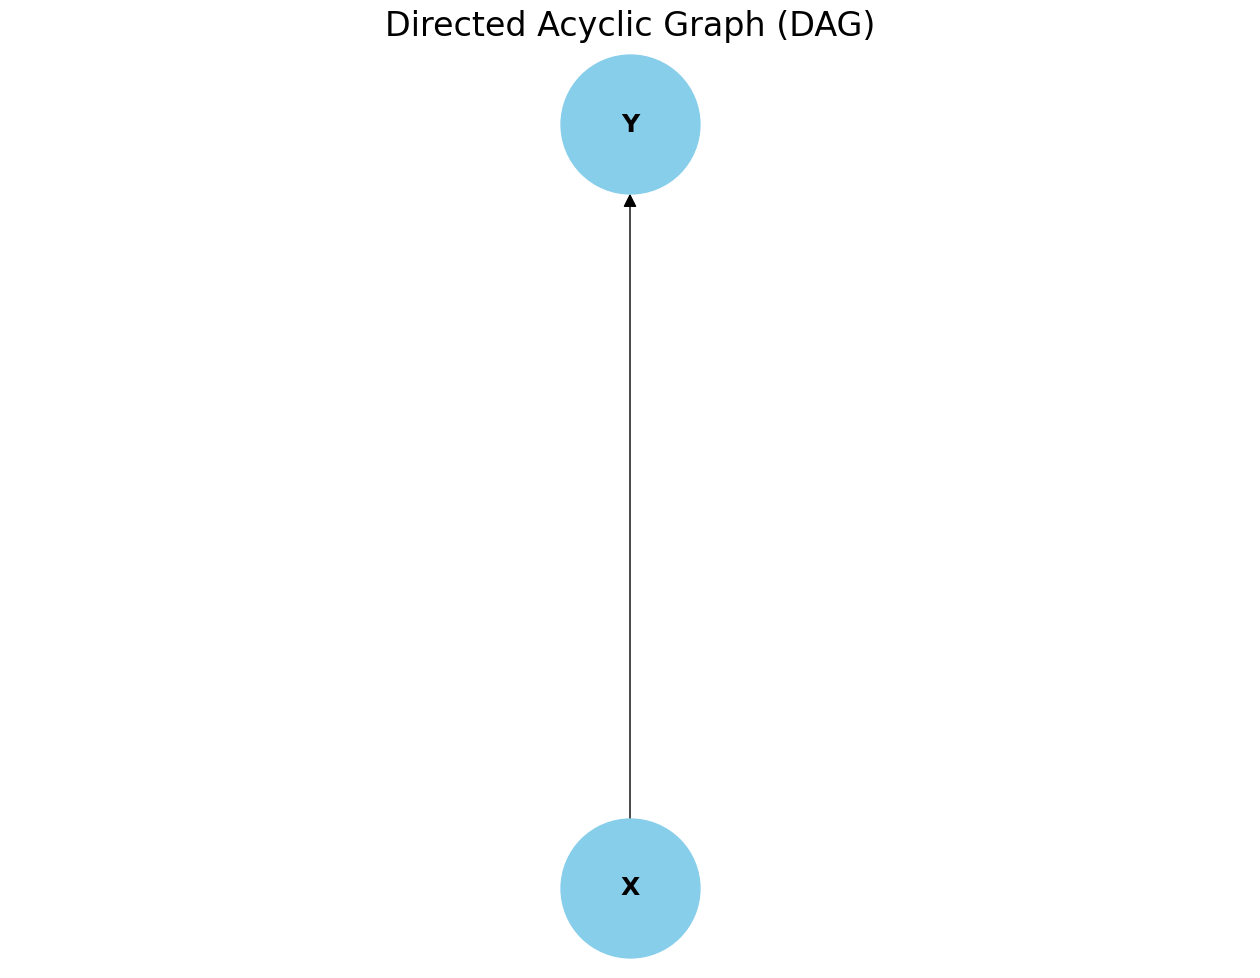

In [55]:
G = nx.DiGraph()
nodes = ['X',  'Y']
G.add_nodes_from(nodes)

edges = [('X', 'Y')]
G.add_edges_from(edges)
node_positions = {'Y': (1, 1), 'X': (1, 0)}

fig, ax = plt.subplots(figsize=(16, 12))

# Layout for the nodes
pos = nx.spring_layout(G)

nx.draw(G, pos=node_positions, with_labels=True, node_size=10000, node_color='skyblue', font_size=18, font_color='black', font_weight='bold', arrowsize=20, ax=ax)
plt.title('Directed Acyclic Graph (DAG)', fontsize=24)
plt.savefig("Step1.png", format="png")
plt.show()

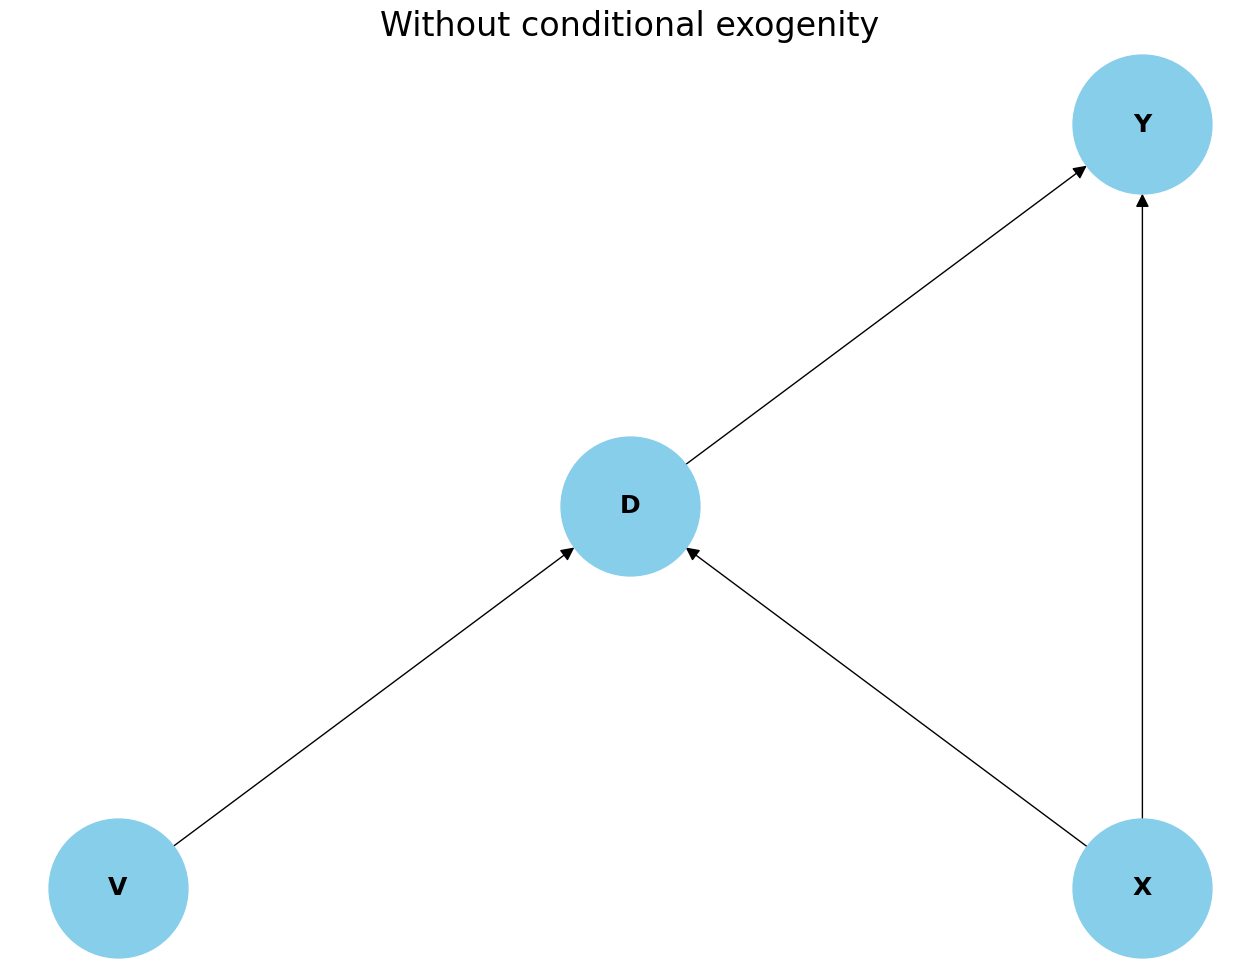

In [2]:
G = nx.DiGraph()
nodes = ['X', 'V', 'D', 'Y']
G.add_nodes_from(nodes)

edges = [('X', 'D'), ('V', 'D'), ('D', 'Y'), ('X', 'Y')]
G.add_edges_from(edges)
node_positions = {'V': (0, 0),  'D': (0.5, 0.5), 'Y': (1, 1), 'X': (1, 0)}

fig, ax = plt.subplots(figsize=(16, 12))

# Layout for the nodes
pos = nx.spring_layout(G)

nx.draw(G, pos=node_positions, with_labels=True, node_size=10000, node_color='skyblue', font_size=18, font_color='black', font_weight='bold', arrowsize=20, ax=ax)
plt.title('Without conditional exogenity', fontsize=24)
plt.savefig("DAG.png", format="png")
plt.show()

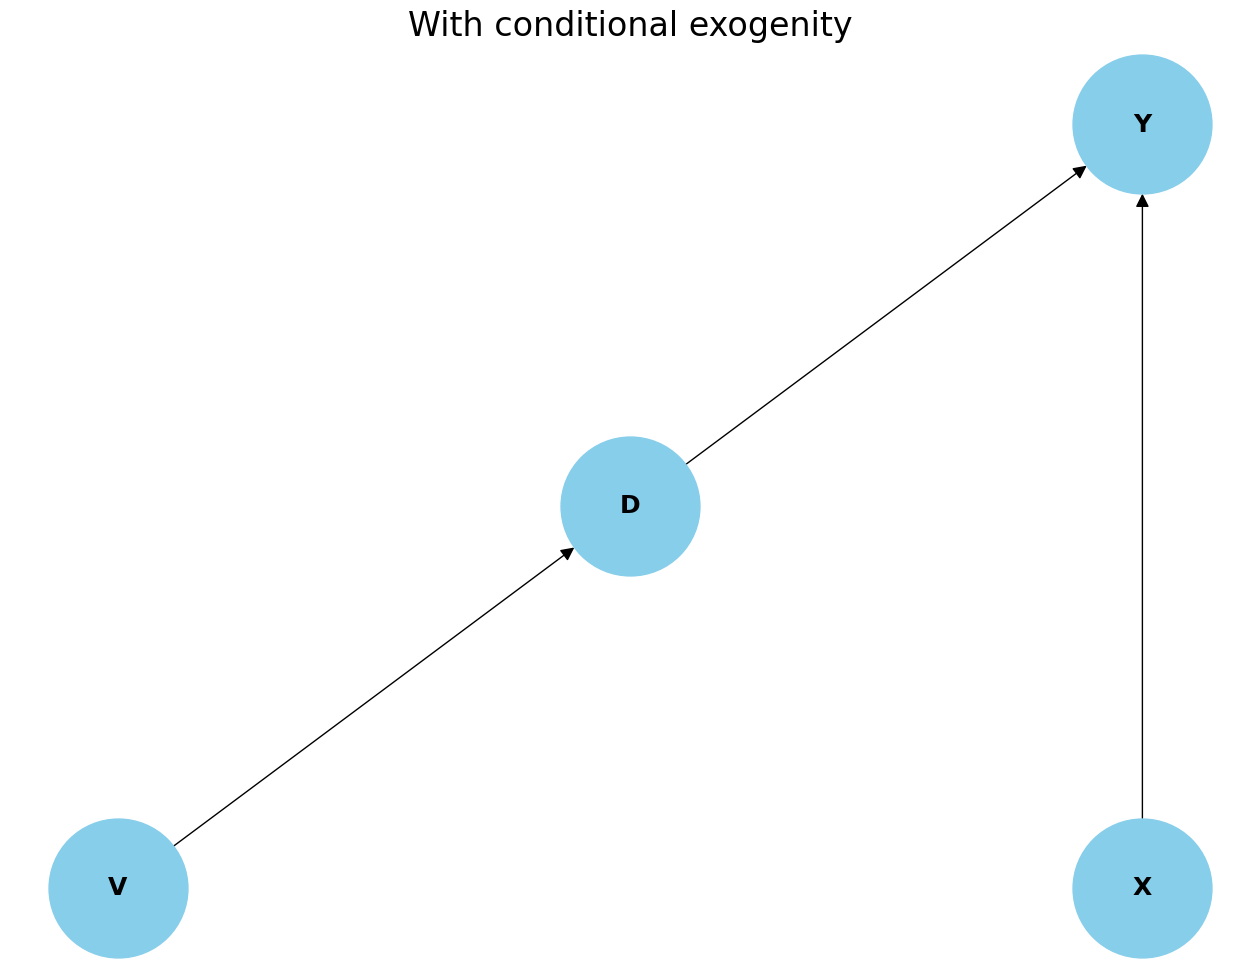

In [3]:
G = nx.DiGraph()
nodes = ['X', 'V', 'D', 'Y']
G.add_nodes_from(nodes)

edges = [('V', 'D'), ('D', 'Y'), ('X', 'Y')]
G.add_edges_from(edges)
node_positions = {'V': (0, 0),  'D': (0.5, 0.5), 'Y': (1, 1), 'X': (1, 0)}

fig, ax = plt.subplots(figsize=(16, 12))

# Layout for the nodes
pos = nx.spring_layout(G)

nx.draw(G, pos=node_positions, with_labels=True, node_size=10000, node_color='skyblue', font_size=18, font_color='black', font_weight='bold', arrowsize=20, ax=ax)
plt.title('With conditional exogenity', fontsize=24)
plt.savefig("DAG_orth.png", format="png")
plt.show()

## Outtakes and Power Point presentation plots

In [333]:
# List of dataframes and their corresponding model names
model_dfs = [("1 Naive", Naive_df), ("2 Linear&Log", LLR_df), ("3 Decision Trees", DT_df), ("4 Random Forests", RF_df), ("5 XGBoost", XGB_df)]

# Initialize an empty list to store the selected variables and their information
selected_dfs = []

# Iterate over dataframes and append information for selected variables
for model_name, df in model_dfs:
    # Filter rows based on conditions
    filtered_df = df[(df['P>|t|'] < 0.1) & (df['coef'] > 0)]

    # Add the significant and positive variables to the list
    selected_vars = filtered_df.index.tolist()

    # Append information to the selected_dfs list
    selected_dfs.append(filtered_df)

# Concatenate the list of DataFrames along rows
selected_df = pd.concat(selected_dfs, keys=[model_name for model_name, _ in model_dfs])

# Reset the index to separate model names and variable names
selected_df.reset_index(level=1, inplace=True)
selected_df.rename(columns={'level_1': 'Variable'}, inplace=True)

# Set the variable name as the index
#selected_df.set_index('Model', inplace=True)

# Print the final DataFrame
selected_df_groupbed = selected_df.groupby("Variable").count().reset_index()
Top_vars = selected_df_groupbed[selected_df_groupbed["coef"]> 4]["Variable"].tolist()
selected_df = selected_df[selected_df.Variable.isin(Top_vars)].reset_index()
selected_df.rename(columns={'index': 'Model'}, inplace=True)
selected_df.set_index('Variable', inplace = True)
selected_df_sorted = selected_df.sort_values(by="coef").groupby(by = ["Variable", "Model"]).max().reset_index()
selected_df_sorted
#excel_file_path = 'output_file.xlsx'
#selected_df_sorted.to_excel(excel_file_path, index=False)

,Variable,Model,coef,std err,t,P>|t|,2.5 %,97.5 %,std err,ml_m,ml_l
0,Contract_Month-to-month,1 Naive,0.3105,0.0043,72.0744,0.0000,0.3020,0.3189,NaN,NaN,NaN
1,Contract_Month-to-month,2 Linear&Log,0.1208,NaN,9.4031,0.0000,0.0957,0.1460,0.0129,0.3745,0.3257
2,Contract_Month-to-month,3 Decision Trees,0.1030,NaN,9.4430,0.0000,0.0810,0.1240,0.0110,0.3800,0.4010
3,Contract_Month-to-month,4 Random Forests,0.1239,NaN,9.7239,0.0000,0.0989,0.1488,0.0127,0.3723,0.3284
4,Contract_Month-to-month,5 XGBoost,0.1120,NaN,8.9336,0.0000,0.0874,0.1366,0.0125,0.3754,0.3396
5,PaperlessBilling,1 Naive,0.1345,0.0056,24.1322,0.0000,0.1236,0.1454,NaN,NaN,NaN
6,PaperlessBilling,2 Linear&Log,0.0473,NaN,4.8593,0.0000,0.0282,0.0664,0.0097,0.3753,0.4505
7,PaperlessBilling,3 Decision Trees,0.0580,NaN,6.2550,0.0000,0.0400,0.0760,0.0090,0.3770,0.4710
8,PaperlessBilling,4 Random Forests,0.0484,NaN,5.0745,0.0000,0.0297,0.0671,0.0095,0.3703,0.4508
9,PaperlessBilling,5 XGBoost,0.0478,NaN,5.0193,0.0000,0.0291,0.0665,0.0095,0.3725,0.4564


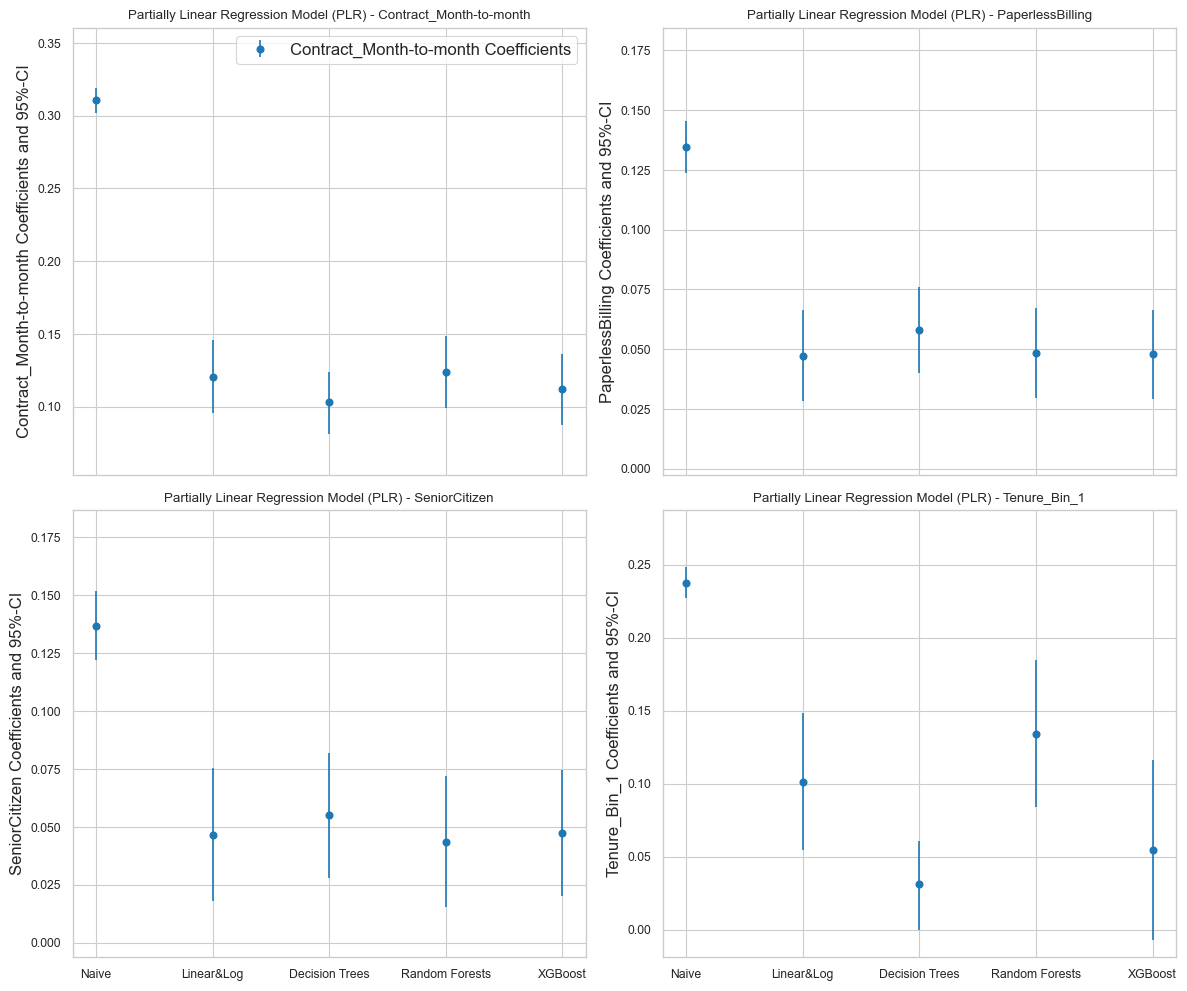

In [334]:
# Initialize errors array
errors = np.full((2, selected_df_sorted.shape[0]), np.nan)
errors[0, :] = selected_df_sorted['coef'] - selected_df_sorted['2.5 %']
errors[1, :] = selected_df_sorted['97.5 %'] - selected_df_sorted['coef']

# Define the desired order for models
model_order = ['Naive', 'Linear&Log', 'Decision Trees', 'Random Forests', 'XGBoost']

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Iterate over each variable in the data frame
for i, variable in enumerate(selected_df_sorted['Variable'].unique()):
    row, col = divmod(i, 2)
    ax = axs[row, col]
    
    # Filter data for the specific variable
    variable_data = selected_df_sorted[selected_df_sorted['Variable'] == variable].copy()  # Make a copy
    
    # Map models to their corresponding order indices
    model_mapping = {model: idx for idx, model in enumerate(model_order)}
    
    # Sort the data based on the custom order
    variable_data['model_order'] = variable_data['Model'].map(model_mapping)
    variable_data = variable_data.sort_values(by='model_order')
    
    # Plot the error bar for each model for the variable in the desired order
    ax.errorbar(variable_data.Model, variable_data['coef'], fmt='o', yerr=errors[:, variable_data.index], label=f'{variable} Coefficients')
    
    # Set y-axis limit dynamically based on min and max values
    min_val = variable_data['coef'].min()
    max_val = variable_data['coef'].max()
    ax.set_ylim([min_val - 0.05, max_val + 0.05])
    
    # Set the desired order for the x-axis
    ax.set_xticks(np.arange(len(model_order)))
    ax.set_xticklabels(model_order)
    
    # Set title and labels
    ax.set_title(f'Partially Linear Regression Model (PLR) - {variable}')
    ax.set_ylabel(f'{variable} Coefficients and 95%-CI')


# Adjust layout for better appearance
plt.tight_layout()

# Show legend
axs[0, 0].legend()
plt.savefig("Verlg.png", format="png")
# Show the plots
plt.show()


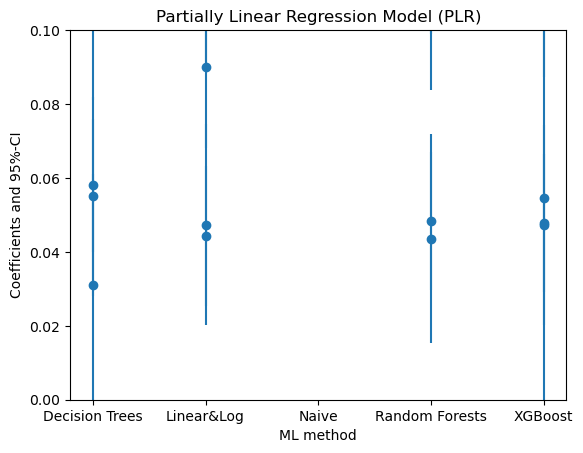

In [951]:
selected_df_sorted[selected_df_sorted["Variable"]=="Tenure_Bin_1"]
errors = np.full((2, selected_df_sorted.shape[0]), np.nan)
errors[0, :] = selected_df_sorted['coef'] - selected_df_sorted['2.5 %']
errors[1, :] = selected_df_sorted['97.5 %'] - selected_df_sorted['coef']
plt.errorbar(selected_df_sorted.Model, selected_df_sorted.coef, fmt='o', yerr=errors)
plt.ylim([0, 0.1])

plt.title('Partially Linear Regression Model (PLR)')
plt.xlabel('ML method')
_ =  plt.ylabel('Coefficients and 95%-CI')